| ![Amazon](https://neokyo.com/img/shop-introduction/amazon/banner.jpg)|
|--------------|


#**# Graph Machine Learning - Amazon Productos de fotografia**


**Integrantes:**

_ Anguie Garcia

_ Mili Galindo

_ Sonia Ramirez

_ Lourdes Rodil|

**Clasificación de Nodos**

**Objetivo** Clasificar los productos de Amazon en una de las ocho (8) categorías en el segmento de fotografia a traves de modelos de grafos.

**Dataset Amazon:** Las redes de Amazon Computers provienen del artículo "Pitfalls of Graph Neural Network Evaluation" y forma parte de la liberia pythorch. Los nodos representan productos y los enlaces indican que dos productos se compran frecuentemente juntos. Dadas las reseñas de productos como características de los nodos en forma de bolsa de palabras, la tarea es mapear los productos a su respectiva categoría.

El grafo consta de 238.162 enlaces.



### **1. Cargar Librerias**

Se instalan las libreria aplicables para la solucion del este caso de negocio.

In [26]:
import os
import pandas as pd
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

2.3.0+cu121
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


## **2. Adquisicion de Datos**

Se importa la libreria el dataset "Amazon" de la Libreria Pytorch donde se eliminan los nodos aislados y se generan las estadisticas del grafo:

In [243]:
import torch
from torch_geometric.datasets import Amazon
from torch_geometric.transforms import RemoveIsolatedNodes

# Load the Amazon  dataset
dataset = Amazon(root='.', name='Photo')

# Get the first graph object from the dataset
data = dataset[0]

# Se excluyen los  nodos aislados
transform =  RemoveIsolatedNodes()

# Apply transformations
data = transform(data)

# Print dataset information
print("Number of nodes:", data.num_nodes)
print("Number of edges:", data.num_edges)
print("Node features shape:", data.x.shape)
print("Number of classes:", dataset.num_classes)
print("Number of node features:", data.num_node_features)  # número de características de los nodos


# Print information about the graph
print(f'\nGraph:')
print('------')
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')


Number of nodes: 7535
Number of edges: 238162
Node features shape: torch.Size([7535, 745])
Number of classes: 8
Number of node features: 745

Graph:
------
Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False


Se seleccionan 5 nodos para visualizar la estructura de los features y Clases (o etiquetas):

In [29]:
# Seleccionar los primeros 5 nodos
num_nodos = 5
nodos = torch.arange(num_nodos)

# Extraer las características de los nodos seleccionados
caracteristicas_nodos = data.x[nodos].numpy()

# Extraer las etiquetas de los nodos seleccionados (si existen)
if data.y is not None:
    etiquetas_nodos = data.y[nodos].numpy()
else:
    etiquetas_nodos = [None] * num_nodos

# Crear un DataFrame con las características y etiquetas
df = pd.DataFrame(caracteristicas_nodos)
df['Clase'] = etiquetas_nodos
df

,0,1,2,3,4,5,6,7,8,9,...,736,737,738,739,740,741,742,743,744,Clase
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,6
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,5


## **3. Visualización del Grafo**

Como se observa existen algunas conexiones de nodos que se encuentran separados del nodo principal:

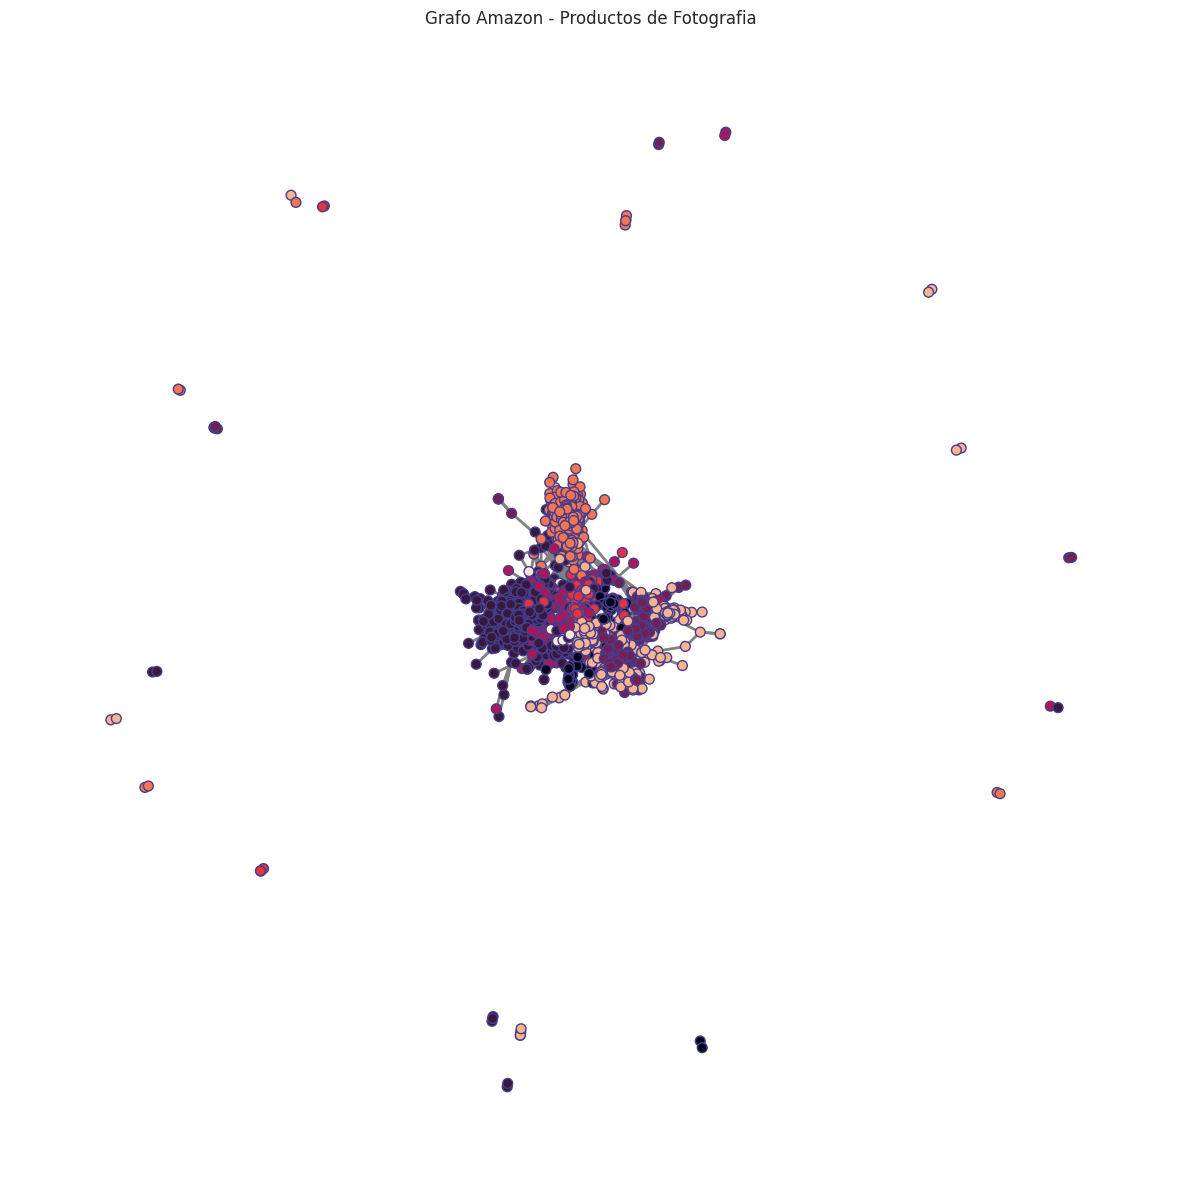

In [30]:
# Install networkx package
!pip install networkx

# Import networkx package
import networkx as nx

# Restate the code with the import statement added
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(15,15))
plt.axis('off')
nx.draw_networkx(G,
                pos=nx.spring_layout(G, seed=0),
                with_labels=False,
                node_size=50,
                node_color=data.y,
                width=2,
                edgecolors='darkslateblue',
                edge_color="grey"
                )
plt.title("Grafo Amazon - Productos de Fotografia")
plt.show()

### **3.1 Visualización del Subgrafo principal**
Se identifica el Subgrafo principal en el dataset Amazon:

In [ ]:
import networkx as nx

# Obtener todas las componentes conectadas del grafo
componentes = list(nx.connected_components(G))

# Seleccionar la componente más grande como el grafo principal
grafo_principal = max(componentes, key=len)

# Crear un subgrafo principal a partir del grafo original
subgrafo_principal = G.subgraph(grafo_principal)

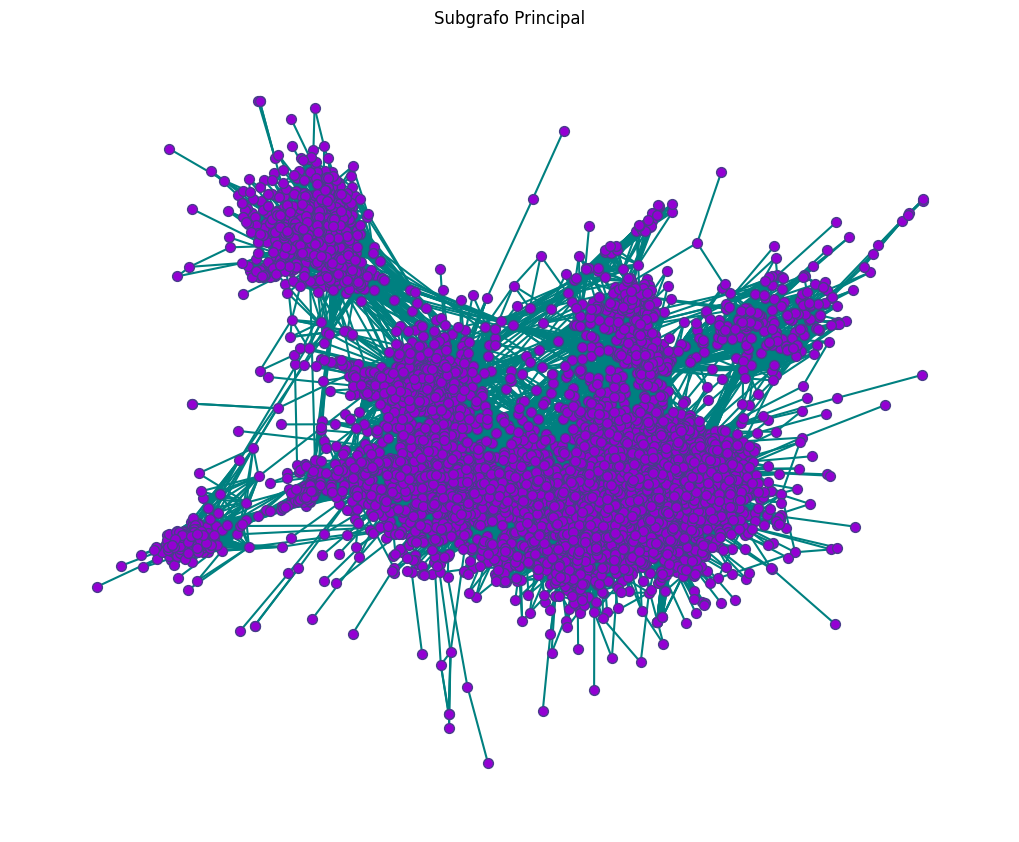

In [ ]:
import matplotlib.pyplot as plt

# Graficar el subgrafo principal
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(subgrafo_principal, seed=42)
nx.draw(subgrafo_principal, pos, with_labels=False, node_size=50, node_color="darkviolet", edge_color='teal', width=1.5,edgecolors='darkslateblue')
plt.title('Subgrafo Principal')
plt.show()


### **3.2. Visualización de Grado de Nodos:**

Se representa la distribución del grado de los nodos en el grafo.

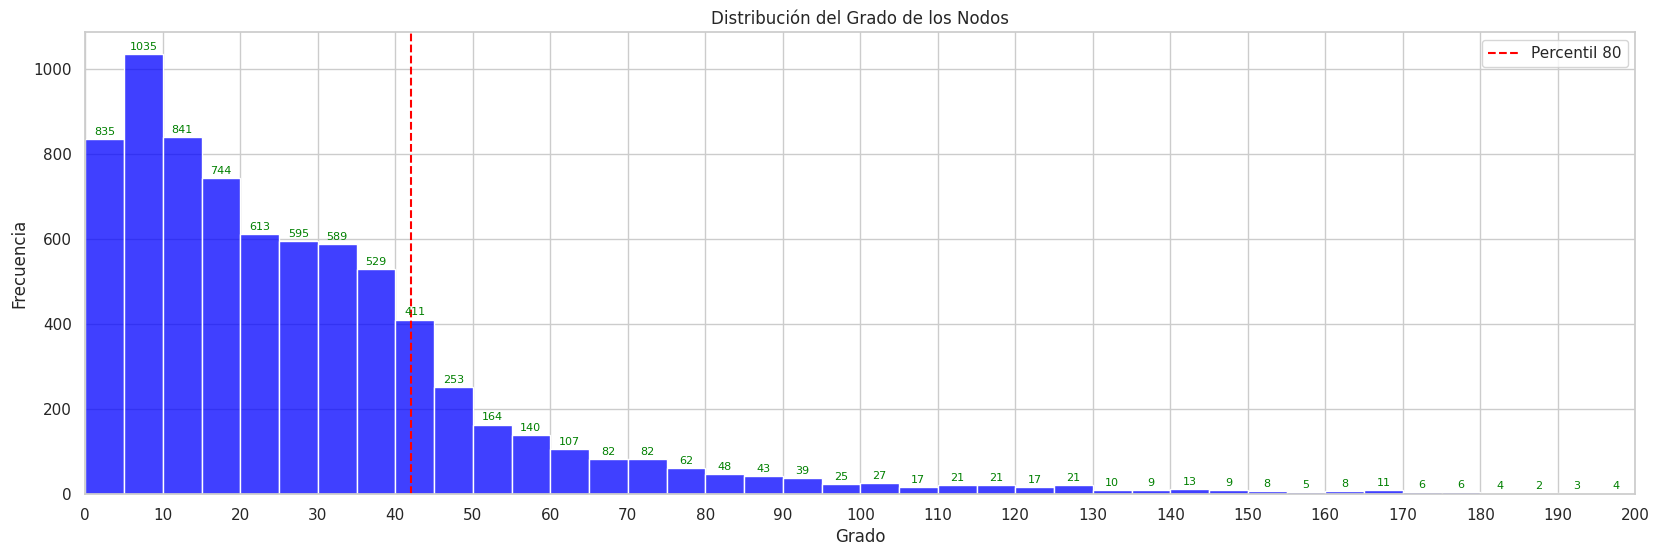

In [42]:
import torch
from torch_geometric.datasets import Amazon
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Calcular el grado de cada nodo
degrees = data.edge_index[0].bincount().numpy()

# Calcular el total de nodos
total_nodos = degrees.sum()

# Calcular los porcentajes
porcentajes = (degrees / total_nodos) * 100

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Calcular el ancho de los bins
ancho_bin = 5

# Calcular el rango de los bins
rango_bins = range(0, 201, ancho_bin)

# Crear un histograma de los grados
plt.figure(figsize=(20, 6))
ax = sns.histplot(degrees, bins=rango_bins, kde=False, color='blue')

# Añadir títulos y etiquetas
plt.title('Distribución del Grado de los Nodos')
plt.xlabel('Grado')
plt.ylabel('Frecuencia')

# Ajustar la escala del eje x para que sea cada 10 unidades y la máxima sea 300
plt.xticks(range(0, 201, 10))
plt.xlim(0, 200)

# Calcular el percentil 80
percentil_80 = np.percentile(degrees, 80)

# Dibujar línea vertical en el percentil 80
plt.axvline(x=percentil_80, color='red', linestyle='--', label='Percentil 80')

# Agregar etiquetas de datos en color verde
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Solo etiquetar barras con altura mayor a 0
        ax.text(patch.get_x() + patch.get_width() / 2, height + 5, int(height),
                ha='center', va='bottom', color='green', fontsize=8)

# Mostrar la gráfica
plt.legend()
plt.show()

### **3.1. Metricas del Grafo**

In [43]:
print(f"""

Propiedades globales del grafo
==============================

        - Degree medio: Número de conexiones medio de los nodos de un grafo.
                {((G.number_of_edges()*2) / G.number_of_nodes()):,.3}
        - Densidad del grafo: Número de conexiones / Número posible de conexiones.
                {nx.density(G)}
        - Otras medidas: Transitividad, Reciprocidad.
                {nx.transitivity(G)}
                {nx.algorithms.clustering(G)}

"""
)



Propiedades globales del grafo

        - Degree medio: Número de conexiones medio de los nodos de un grafo.
                31.6
        - Densidad del grafo: Número de conexiones / Número posible de conexiones.
                0.004195305546067735
        - Otras medidas: Transitividad, Reciprocidad.
                0.17733148009494923
                {0: 0.5555555555555556, 1: 0.45588235294117646, 2: 0.3611111111111111, 3: 0.5, 4: 0.5777777777777777, 5: 0.21215663354763295, 6: 0.4666666666666667, 7: 0.3273001508295626, 8: 0.3619047619047619, 9: 0.8095238095238095, 10: 0.46081277213352684, 11: 1.0, 12: 0.42857142857142855, 13: 1.0, 14: 0.7352941176470589, 15: 0.3333333333333333, 16: 0, 17: 0.3956043956043956, 18: 0.5333333333333333, 19: 0.3076923076923077, 20: 0.19428571428571428, 21: 0.18153846153846154, 22: 0.6995073891625616, 23: 0.3061023622047244, 24: 0.23589269195189638, 25: 0.6153846153846154, 26: 0.2677322677322677, 27: 0.5057471264367817, 28: 0.09497645211930926, 29: 0.638

### **3.2. Analisis de la distribucion de las clases**

Como se observa las 8 clases del dataset, la clase #6 tiene la mayor participacion en el grafo (25.37%) y la clase #7 con la menor (4.33%)

In [244]:
from collections import Counter
import pandas as pd

# Get the labels from the dataset
labels = dataset.data.y

# Count the occurrences of each label
label_counts = Counter(labels.numpy())

# Calculate the total number of samples
total_samples = len(labels)

# Create a list to store the results
results = []

# Calculate class distribution and percentage
for label, count in label_counts.items():
    percentage = (count / total_samples)
    results.append({'Class': label, 'Samples': count, 'proportion': percentage})

# Create a DataFrame from the results
df_agg_classes = pd.DataFrame(results)
df_agg_classes= df_agg_classes.sort_values(by='proportion', ascending=False)

# Print the DataFrame
df_agg_classes



/usr/local/lib/python3.10/dist-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


,Class,Samples,proportion
0,6,1941,0.253725
5,1,1686,0.220392
2,3,915,0.119608
1,4,882,0.115294
3,5,823,0.107582
4,2,703,0.091895
6,0,369,0.048235
7,7,331,0.043268


In [245]:
# Extract proportions from the DataFrame
proportions = df_agg_classes["proportion"].values.tolist()
proportions


[0.25372549019607843,
 0.2203921568627451,
 0.11960784313725491,
 0.11529411764705882,
 0.10758169934640523,
 0.0918954248366013,
 0.04823529411764706,
 0.04326797385620915]

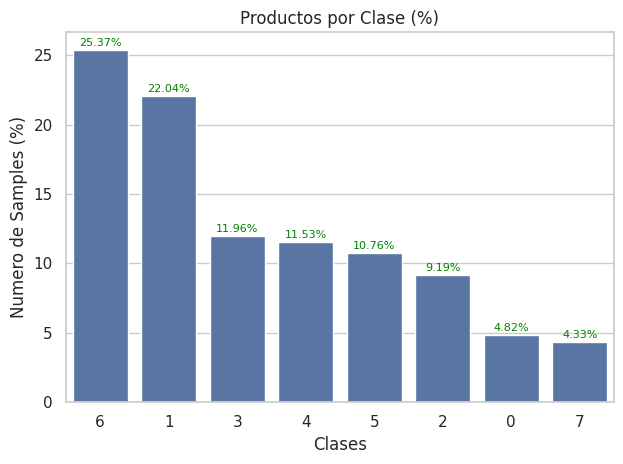

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_agg_classes is already defined and contains the class distribution information

# Set the seaborn style
sns.set(style="whitegrid")

# Create the bar plot using seaborn
ax = sns.barplot(
    x=df_agg_classes['Class'].astype(str),
    y=df_agg_classes['proportion'] * 100,  # multiplying by 100 to show percentages
)

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='Green', xytext=(0, 5),
                textcoords='offset points')

plt.title("Productos por Clase (%)")
plt.xlabel("Clases")
plt.ylabel("Numero de Samples (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



## **4. Separacion del dataset en "Train", "Validation" y "Test"**

Se realiza la separación del grafo con 70% en entrenamiento, 10% validacion y 30% en Test:

In [247]:
# Nodes
num_nodes = data.num_nodes
train_percentage = 0.7
num_train_nodes = int(train_percentage * num_nodes)

# labels
num_classes = torch.unique(data.y).size(0)
data.num_classes = num_classes

print("Nodes #:", num_nodes, "\nNodos en train #:", num_train_nodes, "\nClasses #:", num_classes)

Nodes #: 7535 
Nodos en train #: 5274 
Classes #: 8


In [249]:
# Create a boolean mask to indicate whether node is in training set
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
train_mask[: num_train_nodes] = True

In [250]:
# Add train mask to data object
data.train_mask = train_mask

# Create test mask that is the inverse of train mask
test_mask = ~data.train_mask
data.test_mask = test_mask

data

Data(x=[7535, 745], edge_index=[2, 238162], y=[7535], num_classes=8, train_mask=[7535], test_mask=[7535])

In [251]:
# Porcentaje de nodos para validación
val_percentage = 0.1

# Número de nodos para validación
num_val_nodes = int(val_percentage * num_train_nodes)

# Crear una máscara booleana para indicar qué nodos son de validación
val_mask = torch.zeros(num_nodes, dtype=torch.bool)
val_mask[num_train_nodes:num_train_nodes+num_val_nodes] = True

# Añadir la máscara de validación al objeto data
data.val_mask = val_mask

# Crear máscara de entrenamiento que sea la inversa de la máscara de validación
train_mask = ~(data.val_mask | data.test_mask)
data.train_mask = train_mask



In [252]:
# Mostrar información
print("validation nodes (#): ", num_val_nodes)

# Actualizar el número de nodos de entrenamiento
num_train_nodes = int(train_mask.sum().item())
print("Train nodes # (after validation split): ", num_train_nodes)

num_test_nodes = int(test_mask.sum().item())
print("Test nodes #(after validation split): ", num_test_nodes)

validation nodes (#):  527
Train nodes # (after validation split):  5274
Test nodes #(after validation split):  2261


## **5. Construccion de Modelos**

A continuacion se presentan los modelos desarrollados para realizar este ejercicio:

In [253]:
import torch.nn.functional as F
from torch.nn import Linear, Dropout
from torch_geometric.nn import GCNConv, GATv2Conv, GATConv, SAGEConv
import networkx as nx

In [254]:
def accuracy(y_pred, y_true):
    """Calculate accuracy."""
    return torch.sum(y_pred == y_true) / len(y_true)

In [255]:
def test(model, data, MLP=False):
    model.eval()
    if MLP:
      out = model(data.x)
    else:
      _, out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)

    # Count the number of predictions for each class
    class_counts = {}
    for class_label in range(data.num_classes):
        class_counts[class_label] = int((pred == class_label)[data.test_mask].sum())

    print(class_counts)

    test_acc = accuracy(pred[data.test_mask], data.y[data.test_mask])
    return test_acc

In [256]:
def train(model, data, epochs=10, plot=True, plot_name = "plot", MLP=False):
    weight = torch.tensor([1 / i for i in df_agg_classes["proportion"].values], dtype=torch.float)
    criterion = torch.nn.CrossEntropyLoss(weight=weight)
    optimizer = model.optimizer

    history = {
            'epoch': [],
            'loss': [],
            'test_acc': [],
            'val_loss': [],
            'outputs' : []
    }

    model.train()
    for epoch in range(epochs+1):
        # Training
        optimizer.zero_grad()
        if MLP:
          out = model(data.x)
        else:
          _, out = model(data.x, data.edge_index)

        loss = criterion(out[data.train_mask], data.y[data.train_mask])
        acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
        loss.backward()
        optimizer.step()

        # Validation
        val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
        val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])

        history['epoch'].append(epoch)
        history['loss'].append(loss.item())
        history['test_acc'].append(val_acc)
        history['val_loss'].append(val_loss.item())
        history['outputs'].append(out[data.train_mask].argmax(dim=1))

        # Print metrics every 10 epochs
        if(epoch % 10 == 0):
            print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: '
                  f'{acc*100:>6.2f}% | Val Loss: {val_loss:.2f} | '
                  f'Val Acc: {val_acc*100:.2f}%')

    if plot:
        history_plot(history, plot_name)

    return model

In [257]:
def history_plot(history, plot_name):
    epochs = history['epoch']
    training_loss = history['loss']
    #validation_accuracy = history['test_acc']
    validation_loss = history['val_loss']

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, training_loss, label='Training Loss', color='blue')
    #plt.plot(epochs, validation_accuracy, label='Validation Accuracy', color='orange')
    plt.plot(epochs, validation_loss, label='Validation Loss', color='orange')

    plt.title('Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.legend(loc='upper left')
    plt.savefig(plot_name)
    plt.show()

In [258]:
def visualize(h, color):
  z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

  plt.figure(figsize=(8, 5))
  plt.xticks([])
  plt.yticks([])

  plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="viridis")

### **5.1 Perceptrón Multicapa (MLP)**

Se construye una red neuronal de tipo Perceptrón Multicapa (MLP) utilizando PyTorch para clasificar clases del grafo:

In [92]:
class MLP(torch.nn.Module):
    def __init__(self, dim_input, hidden_channels, dim_output):
        super(MLP, self).__init__()
        torch.manual_seed(42)
        self.lin1 = Linear(dim_input, hidden_channels)
        self.lin2 = Linear(hidden_channels, dim_output)
        self.dropout = 0.5
        self.optimizer = torch.optim.Adam(self.parameters(),
                                      lr=0.01,
                                      weight_decay=5e-4)

    def forward(self, x):
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return F.log_softmax(x, dim=1)

Epoch   0 | Train Loss: 2.243 | Train Acc:   6.69% | Val Loss: 2.23 | Val Acc: 7.21%
Epoch  10 | Train Loss: 1.626 | Train Acc:  24.29% | Val Loss: 1.65 | Val Acc: 24.67%
Epoch  20 | Train Loss: 1.455 | Train Acc:  25.45% | Val Loss: 1.50 | Val Acc: 24.67%
Epoch  30 | Train Loss: 1.368 | Train Acc:  25.45% | Val Loss: 1.45 | Val Acc: 24.67%
Epoch  40 | Train Loss: 1.333 | Train Acc:  33.45% | Val Loss: 1.42 | Val Acc: 30.17%
Epoch  50 | Train Loss: 1.312 | Train Acc:  34.24% | Val Loss: 1.37 | Val Acc: 31.31%
Epoch  60 | Train Loss: 1.284 | Train Acc:  35.27% | Val Loss: 1.36 | Val Acc: 33.02%
Epoch  70 | Train Loss: 1.290 | Train Acc:  35.38% | Val Loss: 1.32 | Val Acc: 33.78%
Epoch  80 | Train Loss: 1.276 | Train Acc:  35.67% | Val Loss: 1.35 | Val Acc: 33.40%
Epoch  90 | Train Loss: 1.233 | Train Acc:  38.34% | Val Loss: 1.28 | Val Acc: 36.81%
Epoch 100 | Train Loss: 1.212 | Train Acc:  39.21% | Val Loss: 1.26 | Val Acc: 38.52%


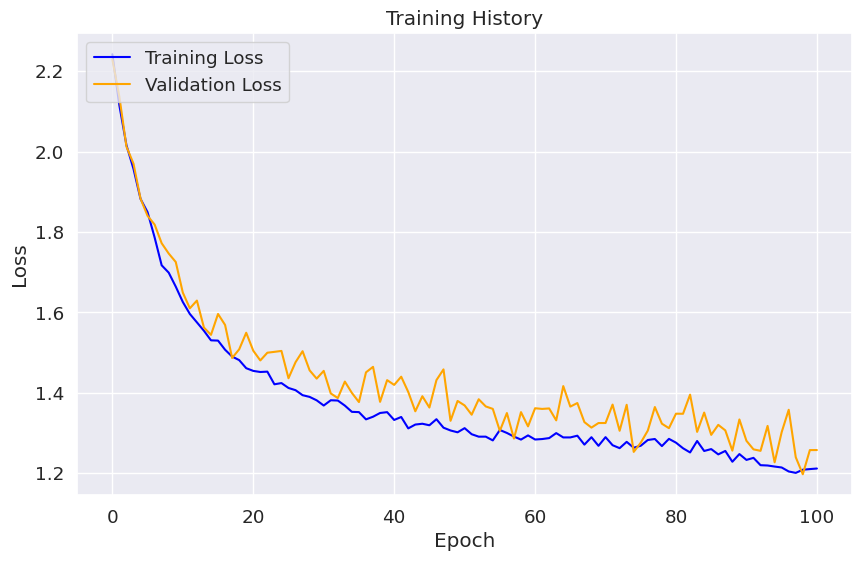

{0: 0, 1: 1, 2: 0, 3: 899, 4: 2, 5: 150, 6: 1209, 7: 0}

MLP test accuracy: 43.52%



In [93]:
mlp = MLP(dataset.num_features, 16, dataset.num_classes)
train(model=mlp, data=data, epochs=100, MLP=True)
MPL_acc1 = test(model=mlp, data=data, MLP=True)
print(f'\nMLP test accuracy: {MPL_acc1*100:.2f}%\n')


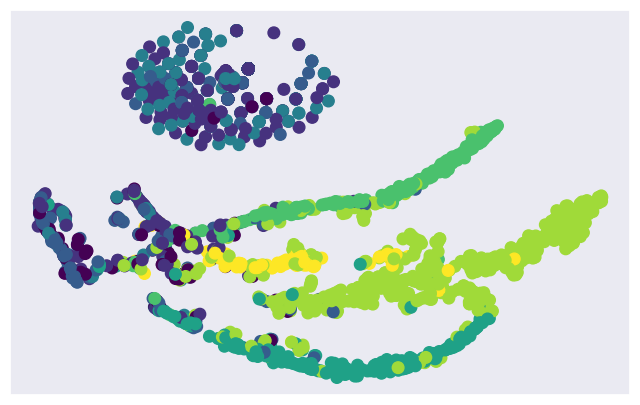

In [94]:
out = mlp(data.x)
visualize(out[data.test_mask], color=data.y[data.test_mask])

###Optimización de Hiperparámetros

In [95]:
from sklearn.model_selection import ParameterGrid

def grid_search(model_class, data, param_grid, epochs=10):
    best_accuracy_MPL = 0
    best_params = None

    for params in ParameterGrid(param_grid):
        model = model_class(data.num_features, params['hidden_channels'], data.num_classes)
        model.optimizer = torch.optim.Adam(model.parameters(), lr=params['lr'], weight_decay=params['weight_decay'])

        trained_model = train(model, data, epochs=epochs, plot=False, MLP=True)
        MPL_acc2 = test(trained_model, data, MLP=True)

        if MPL_acc2 > best_accuracy_MPL:
            best_accuracy_MPL = MPL_acc2
            best_params = params

    return best_params, best_accuracy_MPL

#Espacio de búsqueda de hiperparámetros
param_grid = {
    'hidden_channels': [8, 16, 32],
    'lr': [0.001, 0.01, 0.1],
    'weight_decay': [1e-4, 5e-4, 1e-3]
}

best_params, best_accuracy_MPL = grid_search(MLP, data, param_grid, epochs=100)

print("Best parameters:", best_params)
print("Best accuracy:", best_accuracy_MPL)

Epoch   0 | Train Loss: 2.104 | Train Acc:  18.07% | Val Loss: 2.08 | Val Acc: 20.49%
Epoch  10 | Train Loss: 1.979 | Train Acc:  23.00% | Val Loss: 1.98 | Val Acc: 22.77%
Epoch  20 | Train Loss: 1.900 | Train Acc:  25.43% | Val Loss: 1.91 | Val Acc: 26.76%
Epoch  30 | Train Loss: 1.831 | Train Acc:  26.28% | Val Loss: 1.83 | Val Acc: 27.13%
Epoch  40 | Train Loss: 1.733 | Train Acc:  31.55% | Val Loss: 1.73 | Val Acc: 29.22%
Epoch  50 | Train Loss: 1.680 | Train Acc:  30.83% | Val Loss: 1.68 | Val Acc: 32.07%
Epoch  60 | Train Loss: 1.620 | Train Acc:  31.32% | Val Loss: 1.62 | Val Acc: 32.26%
Epoch  70 | Train Loss: 1.579 | Train Acc:  31.40% | Val Loss: 1.56 | Val Acc: 34.35%
Epoch  80 | Train Loss: 1.543 | Train Acc:  31.72% | Val Loss: 1.54 | Val Acc: 33.21%
Epoch  90 | Train Loss: 1.521 | Train Acc:  32.08% | Val Loss: 1.58 | Val Acc: 29.79%
Epoch 100 | Train Loss: 1.475 | Train Acc:  31.85% | Val Loss: 1.47 | Val Acc: 31.50%
{0: 0, 1: 97, 2: 0, 3: 0, 4: 6, 5: 178, 6: 1980, 7: 0}

In [96]:
#Modelo con los mejores parámetros encontrados
best_model = MLP(data.num_features, best_params['hidden_channels'], data.num_classes)
best_model.optimizer = torch.optim.Adam(best_model.parameters(), lr=best_params['lr'], weight_decay=best_params['weight_decay'])

#Entrenamiento el modelo con los datos completos
best_trained_model = train(best_model, data, epochs=100, plot=False, MLP=True)

#Evaluación el modelo en el conjunto de prueba
test_accuracy = test(best_trained_model, data, MLP=True)

print("Test accuracy with best parameters:", test_accuracy)

Epoch   0 | Train Loss: 2.157 | Train Acc:  10.49% | Val Loss: 2.16 | Val Acc: 9.87%
Epoch  10 | Train Loss: 1.488 | Train Acc:  34.51% | Val Loss: 1.53 | Val Acc: 34.35%
Epoch  20 | Train Loss: 1.217 | Train Acc:  43.14% | Val Loss: 1.23 | Val Acc: 40.04%
Epoch  30 | Train Loss: 1.031 | Train Acc:  49.20% | Val Loss: 1.07 | Val Acc: 45.54%
Epoch  40 | Train Loss: 0.896 | Train Acc:  55.99% | Val Loss: 0.97 | Val Acc: 54.08%
Epoch  50 | Train Loss: 0.856 | Train Acc:  59.99% | Val Loss: 0.94 | Val Acc: 57.31%
Epoch  60 | Train Loss: 0.812 | Train Acc:  62.25% | Val Loss: 0.88 | Val Acc: 60.15%
Epoch  70 | Train Loss: 0.766 | Train Acc:  64.14% | Val Loss: 0.87 | Val Acc: 63.19%
Epoch  80 | Train Loss: 0.732 | Train Acc:  65.91% | Val Loss: 0.84 | Val Acc: 63.76%
Epoch  90 | Train Loss: 0.717 | Train Acc:  67.08% | Val Loss: 0.81 | Val Acc: 65.84%
Epoch 100 | Train Loss: 0.703 | Train Acc:  68.39% | Val Loss: 0.81 | Val Acc: 64.52%
{0: 0, 1: 495, 2: 179, 3: 304, 4: 239, 5: 237, 6: 725, 

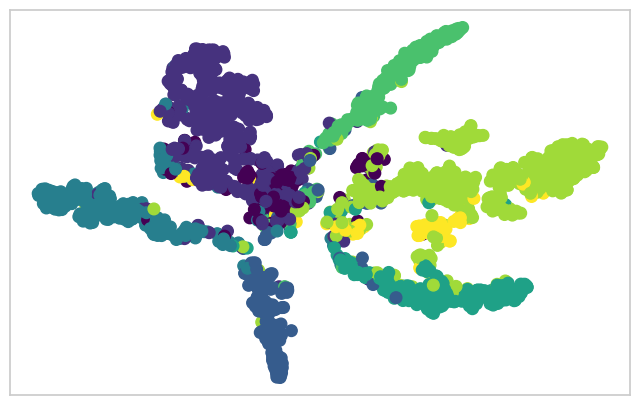

In [ ]:
out = best_model(data.x)
visualize(out[data.test_mask], color=data.y[data.test_mask])

### **5.2 Modelo GCN (Graph Convolutional Network)**

Se construye un modelo donde las capas realizan una operación de "convolución" sobre el grafo, donde la información se agrega de los nodos vecinos a cada nodo para actualizar sus características. Esto es similar a cómo las convoluciones en las CNN agregan información de píxeles vecinos en una imagen.

In [61]:
class GCN(torch.nn.Module):
  def __init__(self, dim_input, dim_output):
      super().__init__()
      torch.manual_seed(42)
      self.conv1 = GCNConv(dim_input, 32)
      self.conv2 = GCNConv(32, 32)
      self.conv3 = GCNConv(32, 16)
      self.conv4 = GCNConv(16, 8)
      self.conv5 = GCNConv(8, dim_output)
      self.optimizer = torch.optim.Adam(self.parameters(),
                                      lr=0.01,
                                      weight_decay=5e-4)

  def forward(self, x, edge_index):
      x = self.conv1(x, edge_index)
      x = F.relu(x)
      x = self.conv2(x, edge_index)
      x = F.relu(x)
      x = self.conv3(x, edge_index)
      x = F.relu(x)
      x = self.conv4(x, edge_index)
      x = F.relu(x)
      x = self.conv5(x, edge_index)
      return x, F.log_softmax(x, dim=1)

Epoch   0 | Train Loss: 2.199 | Train Acc:   8.91% | Val Loss: 2.20 | Val Acc: 10.44%
Epoch  10 | Train Loss: 1.765 | Train Acc:  25.45% | Val Loss: 1.74 | Val Acc: 24.67%
Epoch  20 | Train Loss: 1.439 | Train Acc:  25.45% | Val Loss: 1.39 | Val Acc: 24.67%
Epoch  30 | Train Loss: 1.200 | Train Acc:  35.93% | Val Loss: 1.17 | Val Acc: 33.78%
Epoch  40 | Train Loss: 1.040 | Train Acc:  49.92% | Val Loss: 1.03 | Val Acc: 48.77%
Epoch  50 | Train Loss: 1.000 | Train Acc:  57.15% | Val Loss: 0.99 | Val Acc: 58.63%
Epoch  60 | Train Loss: 0.838 | Train Acc:  64.79% | Val Loss: 0.85 | Val Acc: 64.90%
Epoch  70 | Train Loss: 0.788 | Train Acc:  65.76% | Val Loss: 0.80 | Val Acc: 66.60%
Epoch  80 | Train Loss: 0.616 | Train Acc:  74.27% | Val Loss: 0.62 | Val Acc: 77.04%
Epoch  90 | Train Loss: 0.515 | Train Acc:  82.40% | Val Loss: 0.53 | Val Acc: 82.54%
Epoch 100 | Train Loss: 0.431 | Train Acc:  86.41% | Val Loss: 0.45 | Val Acc: 86.53%


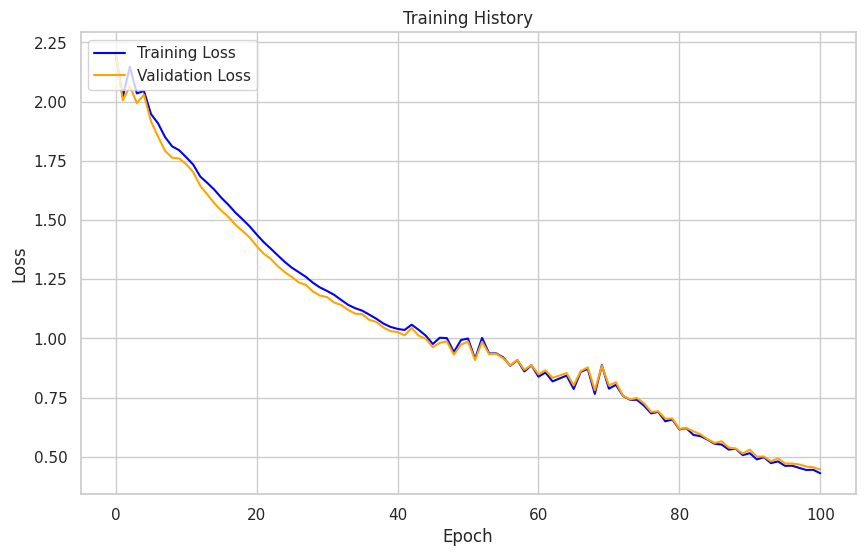

{0: 101, 1: 487, 2: 205, 3: 308, 4: 233, 5: 241, 6: 577, 7: 109}

GCN test accuracy: 87.04%

CPU times: user 28.1 s, sys: 5.21 s, total: 33.3 s
Wall time: 33.5 s


In [62]:
%%time
gcn = GCN(data.num_features, data.num_classes)
train(gcn, data, 100)
GCN_acc1 = test(gcn, data)
print(f'\nGCN test accuracy: {GCN_acc1 *100:.2f}%\n')

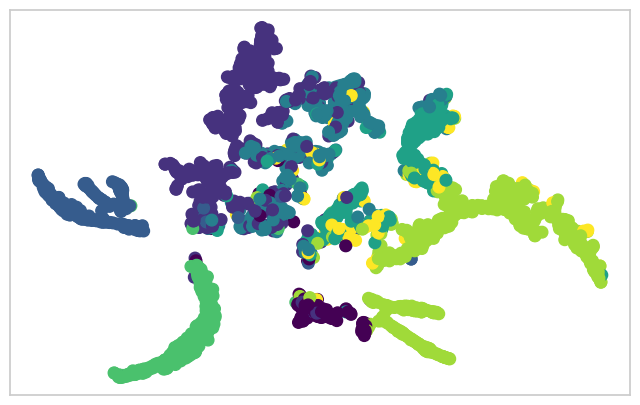

In [63]:
out,_ = gcn(data.x, data.edge_index)
visualize(out[data.test_mask], color=data.y[data.test_mask])

###Optimización de Hiperparámetros

Epoch   0 | Train Loss: 2.199 | Train Acc:   8.91% | Val Loss: 2.20 | Val Acc: 10.44%
Epoch  10 | Train Loss: 1.765 | Train Acc:  25.45% | Val Loss: 1.74 | Val Acc: 24.67%
Epoch  20 | Train Loss: 1.439 | Train Acc:  25.45% | Val Loss: 1.39 | Val Acc: 24.67%
Epoch  30 | Train Loss: 1.200 | Train Acc:  35.93% | Val Loss: 1.17 | Val Acc: 33.78%
Epoch  40 | Train Loss: 1.040 | Train Acc:  49.92% | Val Loss: 1.03 | Val Acc: 48.77%
Epoch  50 | Train Loss: 1.000 | Train Acc:  57.15% | Val Loss: 0.99 | Val Acc: 58.63%
Epoch  60 | Train Loss: 0.838 | Train Acc:  64.79% | Val Loss: 0.85 | Val Acc: 64.90%
Epoch  70 | Train Loss: 0.788 | Train Acc:  65.76% | Val Loss: 0.80 | Val Acc: 66.60%
Epoch  80 | Train Loss: 0.616 | Train Acc:  74.27% | Val Loss: 0.62 | Val Acc: 77.04%
Epoch  90 | Train Loss: 0.515 | Train Acc:  82.40% | Val Loss: 0.53 | Val Acc: 82.54%
Epoch 100 | Train Loss: 0.431 | Train Acc:  86.41% | Val Loss: 0.45 | Val Acc: 86.53%


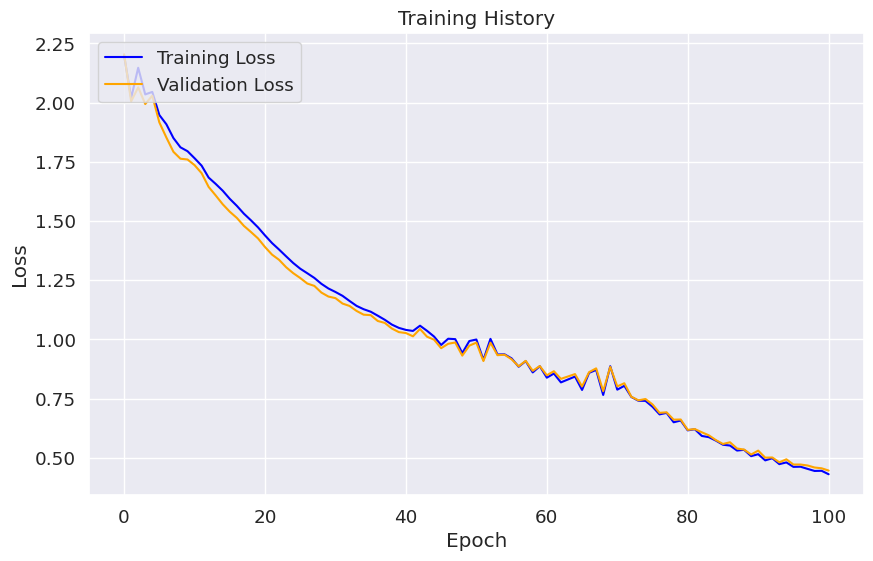

{0: 101, 1: 487, 2: 205, 3: 308, 4: 233, 5: 241, 6: 577, 7: 109}
Epoch   0 | Train Loss: 2.199 | Train Acc:   8.91% | Val Loss: 2.20 | Val Acc: 10.44%
Epoch  10 | Train Loss: 1.844 | Train Acc:  25.45% | Val Loss: 1.79 | Val Acc: 24.67%
Epoch  20 | Train Loss: 1.573 | Train Acc:  28.84% | Val Loss: 1.52 | Val Acc: 28.84%
Epoch  30 | Train Loss: 1.260 | Train Acc:  36.08% | Val Loss: 1.22 | Val Acc: 33.97%
Epoch  40 | Train Loss: 1.028 | Train Acc:  48.26% | Val Loss: 1.00 | Val Acc: 48.01%
Epoch  50 | Train Loss: 0.891 | Train Acc:  52.35% | Val Loss: 0.88 | Val Acc: 49.34%
Epoch  60 | Train Loss: 0.790 | Train Acc:  68.05% | Val Loss: 0.78 | Val Acc: 69.45%
Epoch  70 | Train Loss: 0.731 | Train Acc:  68.62% | Val Loss: 0.72 | Val Acc: 69.26%
Epoch  80 | Train Loss: 0.684 | Train Acc:  71.60% | Val Loss: 0.68 | Val Acc: 73.24%
Epoch  90 | Train Loss: 0.649 | Train Acc:  71.92% | Val Loss: 0.64 | Val Acc: 73.24%
Epoch 100 | Train Loss: 0.629 | Train Acc:  75.37% | Val Loss: 0.62 | Val A

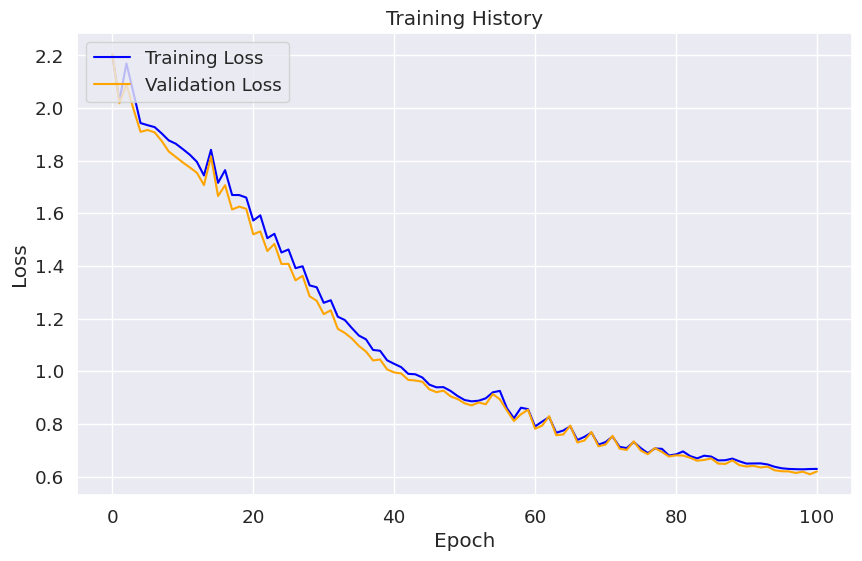

{0: 0, 1: 393, 2: 181, 3: 421, 4: 336, 5: 248, 6: 629, 7: 53}
Epoch   0 | Train Loss: 2.199 | Train Acc:   8.91% | Val Loss: 2.20 | Val Acc: 10.44%
Epoch  10 | Train Loss: 1.978 | Train Acc:   9.44% | Val Loss: 1.94 | Val Acc: 11.01%
Epoch  20 | Train Loss: 1.922 | Train Acc:  25.45% | Val Loss: 1.88 | Val Acc: 24.67%
Epoch  30 | Train Loss: 1.856 | Train Acc:  25.48% | Val Loss: 1.81 | Val Acc: 24.67%
Epoch  40 | Train Loss: 1.753 | Train Acc:  25.73% | Val Loss: 1.71 | Val Acc: 25.05%
Epoch  50 | Train Loss: 1.600 | Train Acc:  33.77% | Val Loss: 1.55 | Val Acc: 32.64%
Epoch  60 | Train Loss: 1.438 | Train Acc:  36.48% | Val Loss: 1.37 | Val Acc: 34.54%
Epoch  70 | Train Loss: 1.297 | Train Acc:  43.44% | Val Loss: 1.24 | Val Acc: 41.37%
Epoch  80 | Train Loss: 1.189 | Train Acc:  43.63% | Val Loss: 1.14 | Val Acc: 40.80%
Epoch  90 | Train Loss: 1.101 | Train Acc:  49.89% | Val Loss: 1.05 | Val Acc: 47.06%
Epoch 100 | Train Loss: 1.037 | Train Acc:  56.83% | Val Loss: 0.99 | Val Acc:

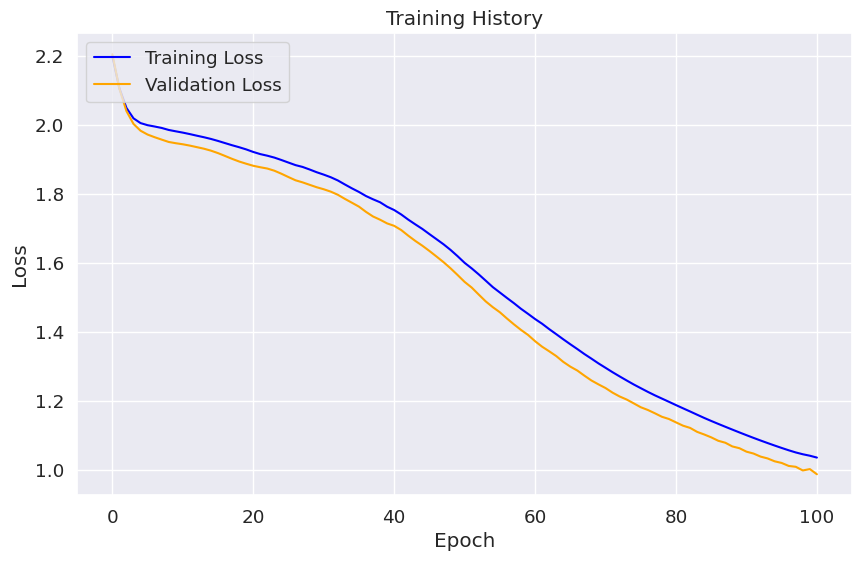

{0: 0, 1: 318, 2: 119, 3: 241, 4: 432, 5: 296, 6: 805, 7: 50}
Epoch   0 | Train Loss: 2.199 | Train Acc:   8.91% | Val Loss: 2.20 | Val Acc: 10.44%
Epoch  10 | Train Loss: 1.977 | Train Acc:   9.44% | Val Loss: 1.94 | Val Acc: 11.01%
Epoch  20 | Train Loss: 1.919 | Train Acc:  25.45% | Val Loss: 1.88 | Val Acc: 24.67%
Epoch  30 | Train Loss: 1.849 | Train Acc:  25.58% | Val Loss: 1.81 | Val Acc: 24.67%
Epoch  40 | Train Loss: 1.727 | Train Acc:  32.86% | Val Loss: 1.68 | Val Acc: 31.69%
Epoch  50 | Train Loss: 1.565 | Train Acc:  36.18% | Val Loss: 1.51 | Val Acc: 34.35%
Epoch  60 | Train Loss: 1.413 | Train Acc:  36.67% | Val Loss: 1.35 | Val Acc: 35.29%
Epoch  70 | Train Loss: 1.268 | Train Acc:  45.83% | Val Loss: 1.21 | Val Acc: 42.69%
Epoch  80 | Train Loss: 1.167 | Train Acc:  44.27% | Val Loss: 1.11 | Val Acc: 40.80%
Epoch  90 | Train Loss: 1.084 | Train Acc:  52.83% | Val Loss: 1.04 | Val Acc: 49.72%
Epoch 100 | Train Loss: 1.015 | Train Acc:  67.73% | Val Loss: 0.97 | Val Acc:

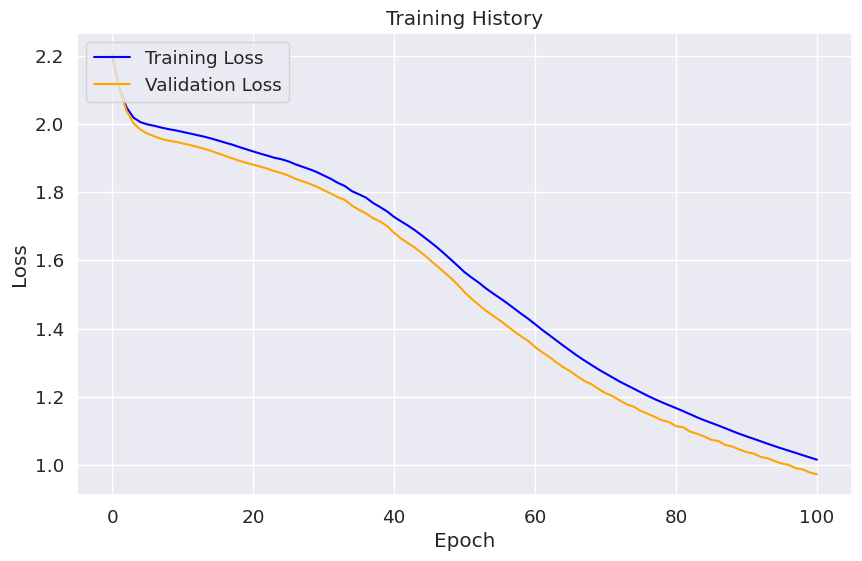

{0: 0, 1: 346, 2: 179, 3: 232, 4: 303, 5: 278, 6: 822, 7: 101}
Best validation accuracy: tensor(0.8704)
Best hyperparameters: {'lr': 0.01, 'weight_decay': 0.0005}


In [97]:
#Espacio de búsqueda de hiperparámetros
hyperparams_grid = {
    'lr': [0.01, 0.001],
    'weight_decay': [5e-4, 1e-4],
    # Agrega más hiperparámetros según lo desees
}

best_val_acc = 0
best_hyperparams = {}

# Combinaciones de hiperparámetros
for lr in hyperparams_grid['lr']:
    for weight_decay in hyperparams_grid['weight_decay']:
        # Crea una nueva instancia del modelo con los hiperparámetros actuales
        gcn = GCN(data.num_features, data.num_classes)
        gcn.optimizer = torch.optim.Adam(gcn.parameters(), lr=lr, weight_decay=weight_decay)


        trained_model = train(gcn, data, epochs=100)

        # Evaluación del modelo en el conjunto de validación
        val_acc = test(trained_model, data)

        # Actualización de los mejores hiperparámetros si se obtiene un mejor resultado
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_hyperparams['lr'] = lr
            best_hyperparams['weight_decay'] = weight_decay

# Mejores modelos
print("Best validation accuracy:", best_val_acc)
print("Best hyperparameters:", best_hyperparams)

Epoch   0 | Train Loss: 2.199 | Train Acc:   8.91% | Val Loss: 2.20 | Val Acc: 10.44%
Epoch  10 | Train Loss: 1.765 | Train Acc:  25.45% | Val Loss: 1.74 | Val Acc: 24.67%
Epoch  20 | Train Loss: 1.439 | Train Acc:  25.45% | Val Loss: 1.39 | Val Acc: 24.67%
Epoch  30 | Train Loss: 1.200 | Train Acc:  35.93% | Val Loss: 1.17 | Val Acc: 33.78%
Epoch  40 | Train Loss: 1.040 | Train Acc:  49.92% | Val Loss: 1.03 | Val Acc: 48.77%
Epoch  50 | Train Loss: 1.000 | Train Acc:  57.15% | Val Loss: 0.99 | Val Acc: 58.63%
Epoch  60 | Train Loss: 0.838 | Train Acc:  64.79% | Val Loss: 0.85 | Val Acc: 64.90%
Epoch  70 | Train Loss: 0.788 | Train Acc:  65.76% | Val Loss: 0.80 | Val Acc: 66.60%
Epoch  80 | Train Loss: 0.616 | Train Acc:  74.27% | Val Loss: 0.62 | Val Acc: 77.04%
Epoch  90 | Train Loss: 0.515 | Train Acc:  82.40% | Val Loss: 0.53 | Val Acc: 82.54%
Epoch 100 | Train Loss: 0.431 | Train Acc:  86.41% | Val Loss: 0.45 | Val Acc: 86.53%


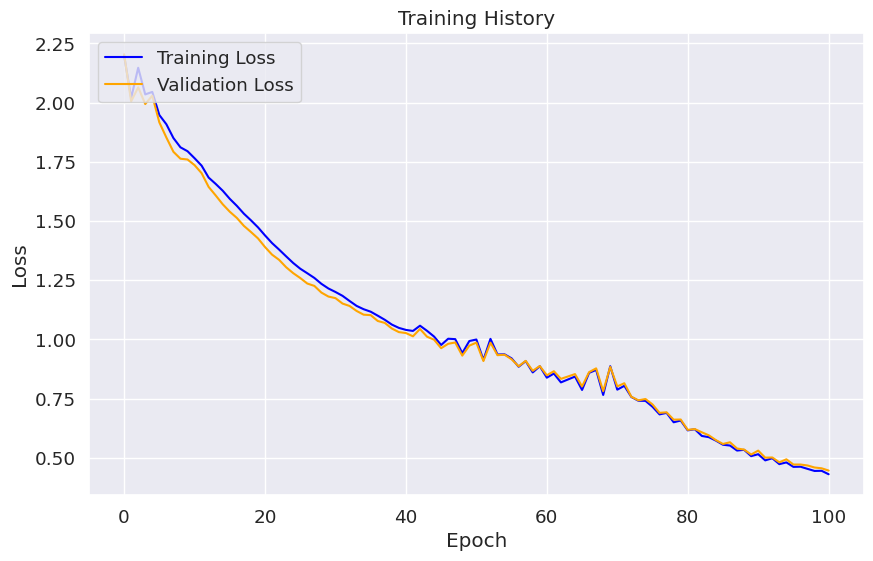

{0: 101, 1: 487, 2: 205, 3: 308, 4: 233, 5: 241, 6: 577, 7: 109}
Test accuracy with best hyperparameters: tensor(0.8704)


In [98]:
# Modelo con los mejores hiperparámetros
best_gcn = GCN(data.num_features, data.num_classes)
best_gcn.optimizer = torch.optim.Adam(best_gcn.parameters(), lr=best_hyperparams['lr'], weight_decay=best_hyperparams['weight_decay'])

# Entrenamiento del modelo en todo el conjunto de datos (entrenamiento + validación)
best_trained_model = train(best_gcn, data, epochs=100)

# Evaluación del modelo en el conjunto de prueba
test_acc = test(best_trained_model, data)

# Accuracy
print("Test accuracy with best hyperparameters:", test_acc)

### **5.3 Modelo  GATv2Conv**

Se construye un modelo GATv2 que esuna versión mejorada de GATConv que incluye mejoras en la eficiencia computacional y la estabilidad del entrenamiento. Utiliza una concatenación de entradas a lo largo de múltiples cabezas de atención, seguida de una operación de agrupación y una función de activación para calcular las ponderaciones de atención

In [259]:
class GAT(torch.nn.Module):
  def __init__(self, dim_input, dim_hidden, dim_output, heads=8):
    super().__init__()
    torch.manual_seed(42)
    self.gat1 = GATv2Conv(dim_input, dim_hidden, heads=heads)
    self.gat2 = GATv2Conv(dim_hidden*heads, dim_output, heads=1)
    self.optimizer = torch.optim.Adam(self.parameters(),
                                      lr=0.01,
                                      weight_decay=5e-4)

  def forward(self, x, edge_index):
    x = self.gat1(x, edge_index)
    x = F.relu(x)
    x = F.dropout(x, p=0.5, training=self.training)
    x = self.gat2(x, edge_index)
    return x, F.log_softmax(x, dim=1)

Epoch   0 | Train Loss: 2.342 | Train Acc:  11.87% | Val Loss: 2.33 | Val Acc: 12.52%
Epoch  10 | Train Loss: 1.495 | Train Acc:  31.55% | Val Loss: 1.48 | Val Acc: 31.12%
Epoch  20 | Train Loss: 0.826 | Train Acc:  67.37% | Val Loss: 0.88 | Val Acc: 65.28%
Epoch  30 | Train Loss: 0.477 | Train Acc:  82.46% | Val Loss: 0.50 | Val Acc: 83.68%
Epoch  40 | Train Loss: 0.331 | Train Acc:  86.61% | Val Loss: 0.37 | Val Acc: 87.29%
Epoch  50 | Train Loss: 0.271 | Train Acc:  90.71% | Val Loss: 0.35 | Val Acc: 89.37%
Epoch  60 | Train Loss: 0.206 | Train Acc:  93.48% | Val Loss: 0.29 | Val Acc: 92.79%
Epoch  70 | Train Loss: 0.187 | Train Acc:  94.05% | Val Loss: 0.28 | Val Acc: 93.17%
Epoch  80 | Train Loss: 0.158 | Train Acc:  94.50% | Val Loss: 0.26 | Val Acc: 92.41%
Epoch  90 | Train Loss: 0.134 | Train Acc:  95.68% | Val Loss: 0.25 | Val Acc: 94.31%
Epoch 100 | Train Loss: 0.135 | Train Acc:  95.68% | Val Loss: 0.20 | Val Acc: 93.74%


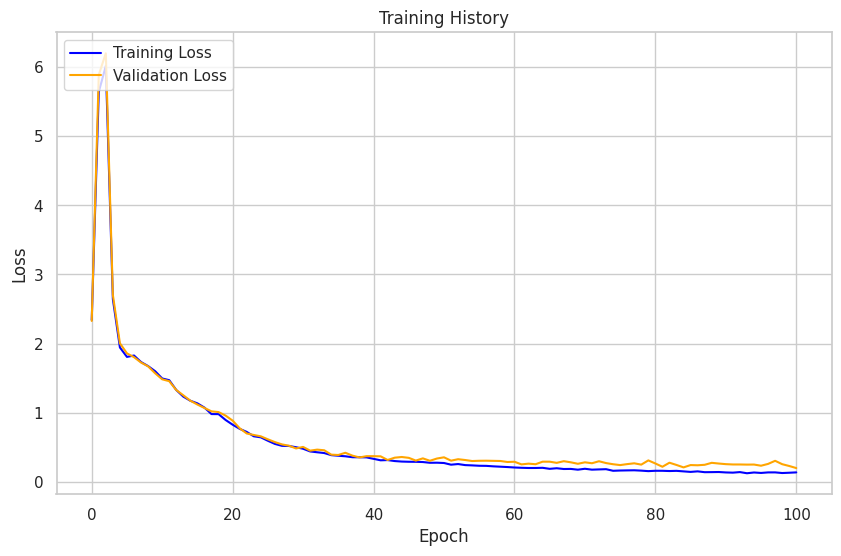

{0: 103, 1: 484, 2: 204, 3: 302, 4: 252, 5: 237, 6: 600, 7: 79}

GATv2Conv test accuracy: 94.60%

CPU times: user 1min 22s, sys: 1min 35s, total: 2min 58s
Wall time: 2min 59s


In [260]:
%%time
gat = GAT(data.num_features, 16, data.num_classes)
train(gat, data, 100)
GATv2Conv_acc = test(gat, data)
print(f'\nGATv2Conv test accuracy: {GATv2Conv_acc*100:.2f}%\n')

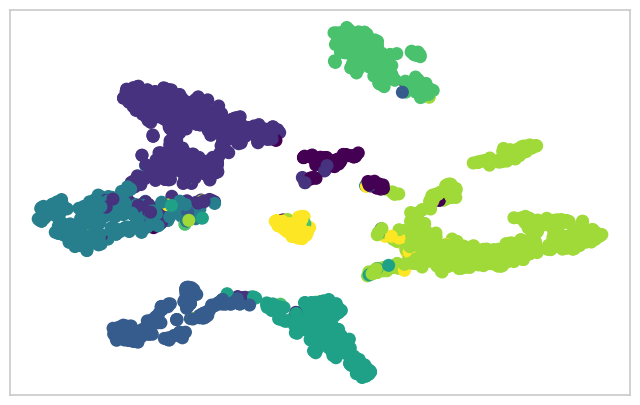

In [ ]:
out,_ = gat(data.x, data.edge_index)
visualize(out[data.test_mask], color=data.y[data.test_mask])

**Matriz de Confusion**

A continuacion se genera la matriz de confusion de mejor modelo, donde se observa que las clases #3 y #9 presentan los mayores errores en clasificacion:

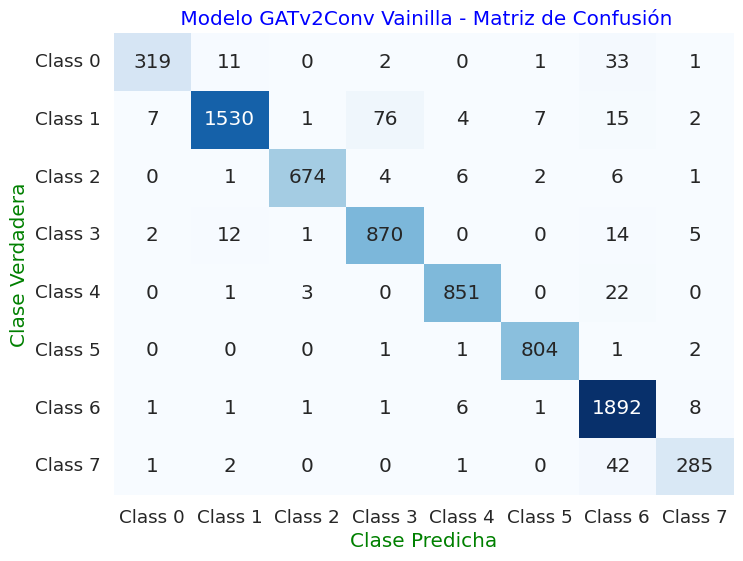

In [234]:
from sklearn.metrics import confusion_matrix

# Obtener las etiquetas verdaderas y las predicciones del modelo
true_classes = data.y.numpy()
with torch.no_grad():
    _, predictions = gat(data.x, data.edge_index)
    _, predicted_classes = predictions.max(dim=1)
predicted_classes = predicted_classes.numpy()

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Obtener nombres de las clases
class_names = [f'Class {i}' for i in range(data.num_classes)]

# Crear la figura de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajustar el tamaño de fuente

# Crear un mapa de calor con la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)

# Añadir etiquetas y título
plt.title(' Modelo GATv2Conv Vainilla - Matriz de Confusión', color='blue')
plt.xlabel('Clase Predicha', color='green')
plt.ylabel('Clase Verdadera', color='green')

# Mostrar la gráfica
plt.show()

### **Visualizacion del Grafo luego de la ejecucion del modelo**

Este código utiliza la biblioteca NetworkX para crear y dibujar el grafo. Cada nodo es verde si su predicción coincide con su etiqueta real, y en rojo si no coincide.

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


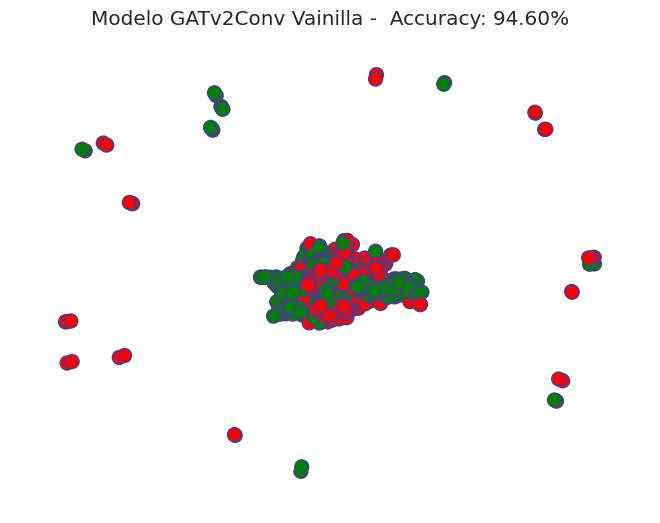

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import torch
from torch_geometric.datasets import TUDataset
from torch_geometric.data import DataLoader
from sklearn.metrics import accuracy_score



# Obtener predicciones del modelo para el conjunto de datos
def get_predictions(gat, data):
    gat.eval()
    with torch.no_grad():
        out, _ = gat(data.x, data.edge_index)
    return torch.argmax(out, dim=1)


# Obtener predicciones del modelo y las etiquetas reales
predictions = get_predictions(gat, data)
labels = data.y

# Calcular la exactitud del modelo
accuracy = accuracy_score(labels, predictions)

# Crear el grafo utilizando NetworkX
G = nx.Graph()
# Agregar nodos al grafo
for i in range(len(labels)):
    G.add_node(i, label=labels[i].item(), prediction=predictions[i].item(), color='green' if labels[i].item() == predictions[i].item() else 'red')
# Agregar aristas al grafo
for i, j in data.edge_index.t().tolist():
    G.add_edge(i, j)

# Dibujar el grafo
node_colors = [node[1]['color'] for node in G.nodes(data=True)]
nx.draw(G, with_labels=False, node_color=node_colors, cmap=plt.cm.Reds, node_size=50, edgecolors='darkslateblue',font_size=8)
plt.title(f'Modelo GATv2Conv Vainilla -  Accuracy: {GATv2Conv_acc * 100:.2f}%')
plt.show()

### **Optimización de hiperparámetros**

Epoch   0 | Train Loss: 2.024 | Train Acc:  24.46% | Val Loss: 2.03 | Val Acc: 24.67%
Epoch  10 | Train Loss: 1.151 | Train Acc:  65.43% | Val Loss: 1.15 | Val Acc: 66.98%
Epoch  20 | Train Loss: 0.648 | Train Acc:  76.56% | Val Loss: 0.62 | Val Acc: 79.32%
Epoch  30 | Train Loss: 0.439 | Train Acc:  83.85% | Val Loss: 0.44 | Val Acc: 86.53%
Epoch  40 | Train Loss: 0.312 | Train Acc:  88.64% | Val Loss: 0.30 | Val Acc: 91.27%
Epoch  50 | Train Loss: 0.258 | Train Acc:  91.92% | Val Loss: 0.25 | Val Acc: 92.79%


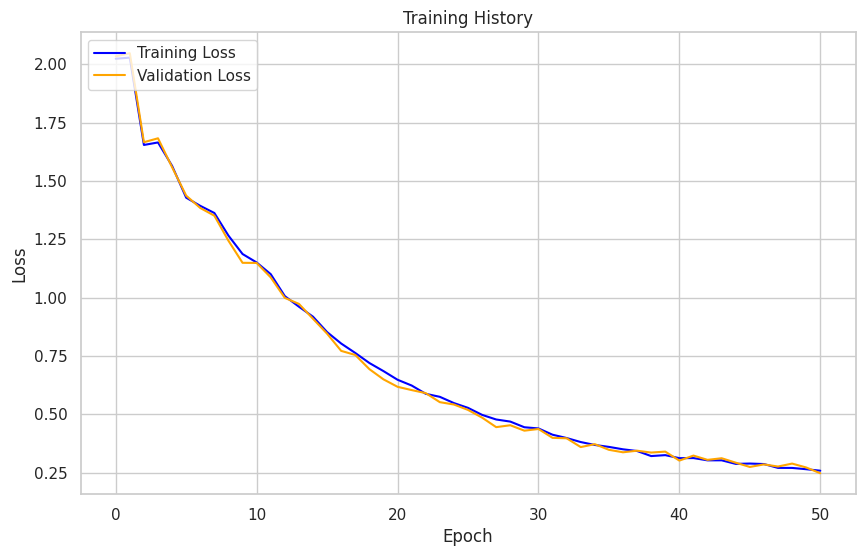

{0: 93, 1: 493, 2: 198, 3: 309, 4: 243, 5: 233, 6: 617, 7: 75}


TypeError: 'Tensor' object is not callable

In [262]:
import random

# Definir rangos de hiperparámetros a explorar
hyperparameters = {
    'lr': [0.001, 0.01],
    'heads': [ 8, 12],
    'dim_hidden': [32, 64],
    'p': [0.3, 0.5],
    'weight_decay': [ 5e-4, 1e-3]
}

best_accuracy_GATv2Conv = 0
best_hyperparameters = {}

# Realizar búsqueda aleatoria
for _ in range(10):  # Realizar 10 iteraciones de búsqueda aleatoria
    # Seleccionar aleatoriamente un conjunto de hiperparámetros
    hyperparams = {param: random.choice(values) for param, values in hyperparameters.items()}

    # Crear y entrenar el modelo con los hiperparámetros seleccionados
    gat = GAT(data.num_features, hyperparams['dim_hidden'], data.num_classes, heads=hyperparams['heads'])
    gat.optimizer = torch.optim.Adam(gat.parameters(), lr=hyperparams['lr'], weight_decay=hyperparams['weight_decay'])
    train(gat, data, epochs=50)

    # Evaluar el modelo en el conjunto de validación
    accuracy = test(gat, data)

    # Actualizar el mejor conjunto de hiperparámetros si se obtiene un mejor rendimiento
    if accuracy > best_accuracy_GATv2Conv:
        best_accuracy_GATv2Conv = accuracy
        best_hyperparameters = hyperparams

print("Best hyperparameters:", best_hyperparameters)
print("Best accuracy GATv2Conv:", best_accuracy_GATv2Conv)

Nota: No converge

### **5.4 Modelo  GATConv**

Se construye un modelo GATConv que se considera la implementación original de Graph Attention Network (GAT) en PyTorch Geometric y proporciona una forma de calcular las ponderaciones de atención utilizando una capa lineal para calcular la atención.

In [67]:
class GATc(torch.nn.Module):
  def __init__(self, dim_input, dim_output):
    super().__init__()
    torch.manual_seed(42)
    self.conv1 = GATConv(in_channels=dim_input, out_channels=32, heads=32)
    self.conv2 = GATConv(in_channels=32 * 32, out_channels=16, heads=16)
    self.conv3 = GATConv(in_channels=16 * 16, out_channels=8, heads=8)
    self.conv4 = GATConv(in_channels=8 * 8, out_channels=4, heads=4)
    self.conv5 = GATConv(in_channels=4 * 4, out_channels=dim_output)
    self.optimizer = torch.optim.Adam(self.parameters(),
                                      lr=0.01,
                                      weight_decay=5e-4)

  def forward(self, x, edge_index):
    x = self.conv1(x, edge_index)
    x = F.relu(x)
    x = self.conv2(x, edge_index)
    x = F.relu(x)
    x = self.conv3(x, edge_index)
    x = F.relu(x)
    x = self.conv4(x, edge_index)
    x = F.relu(x)
    x = self.conv5(x, edge_index)
    return x, F.log_softmax(x, dim=1)

Epoch   0 | Train Loss: 2.143 | Train Acc:  11.74% | Val Loss: 2.14 | Val Acc: 11.20%
Epoch  10 | Train Loss: 2.007 | Train Acc:   8.97% | Val Loss: 2.00 | Val Acc: 7.02%
Epoch  20 | Train Loss: 2.009 | Train Acc:  25.45% | Val Loss: 2.01 | Val Acc: 24.67%
Epoch  30 | Train Loss: 1.964 | Train Acc:  25.45% | Val Loss: 1.97 | Val Acc: 24.67%
Epoch  40 | Train Loss: 1.921 | Train Acc:  25.45% | Val Loss: 1.92 | Val Acc: 24.67%
Epoch  50 | Train Loss: 1.882 | Train Acc:  25.45% | Val Loss: 1.88 | Val Acc: 24.67%
Epoch  60 | Train Loss: 1.849 | Train Acc:  25.45% | Val Loss: 1.85 | Val Acc: 24.67%


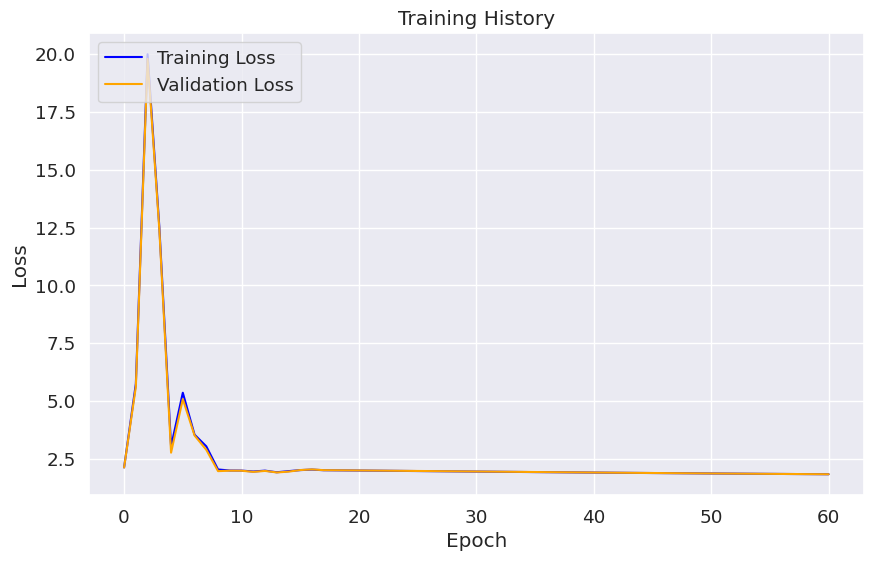

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 2261, 7: 0}

GATConv test accuracy: 25.17%

CPU times: user 3min 17s, sys: 3min 59s, total: 7min 16s
Wall time: 7min 19s


In [68]:
%%time
gat2 = GATc(data.num_features, data.num_classes)
train(gat2, data, 60)
GATvConv_acc = test(gat2, data)
print(f'\nGATConv test accuracy: {GATvConv_acc*100:.2f}%\n')


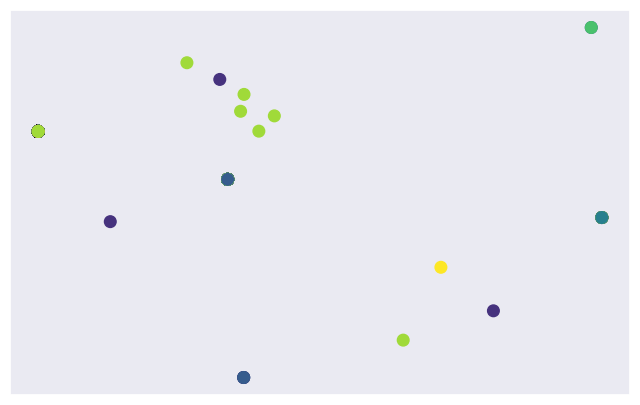

In [238]:
out,_ = gat2(data.x, data.edge_index)
visualize(out[data.test_mask], color=data.y[data.test_mask])

###Optimización de hiperparámetros

Epoch   0 | Train Loss: 2.143 | Train Acc:  11.74% | Val Loss: 2.14 | Val Acc: 11.20%
Epoch  10 | Train Loss: 2.007 | Train Acc:   8.97% | Val Loss: 2.00 | Val Acc: 7.02%
Epoch  20 | Train Loss: 2.009 | Train Acc:  25.45% | Val Loss: 2.01 | Val Acc: 24.67%
Epoch  30 | Train Loss: 1.964 | Train Acc:  25.45% | Val Loss: 1.97 | Val Acc: 24.67%
Epoch  40 | Train Loss: 1.921 | Train Acc:  25.45% | Val Loss: 1.92 | Val Acc: 24.67%
Epoch  50 | Train Loss: 1.882 | Train Acc:  25.45% | Val Loss: 1.88 | Val Acc: 24.67%
Epoch  60 | Train Loss: 1.849 | Train Acc:  25.45% | Val Loss: 1.85 | Val Acc: 24.67%


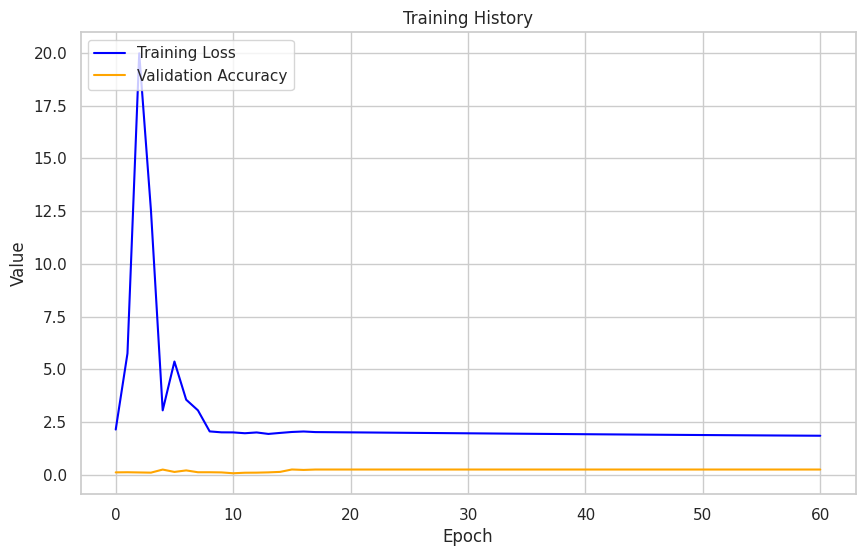

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 2261, 7: 0}
Epoch   0 | Train Loss: 2.143 | Train Acc:  11.74% | Val Loss: 2.14 | Val Acc: 11.20%
Epoch  10 | Train Loss: 2.007 | Train Acc:   8.97% | Val Loss: 2.00 | Val Acc: 7.02%
Epoch  20 | Train Loss: 2.009 | Train Acc:  25.45% | Val Loss: 2.01 | Val Acc: 24.67%
Epoch  30 | Train Loss: 1.964 | Train Acc:  25.45% | Val Loss: 1.97 | Val Acc: 24.67%
Epoch  40 | Train Loss: 1.921 | Train Acc:  25.45% | Val Loss: 1.92 | Val Acc: 24.67%
Epoch  50 | Train Loss: 1.882 | Train Acc:  25.45% | Val Loss: 1.88 | Val Acc: 24.67%
Epoch  60 | Train Loss: 1.849 | Train Acc:  25.45% | Val Loss: 1.85 | Val Acc: 24.67%


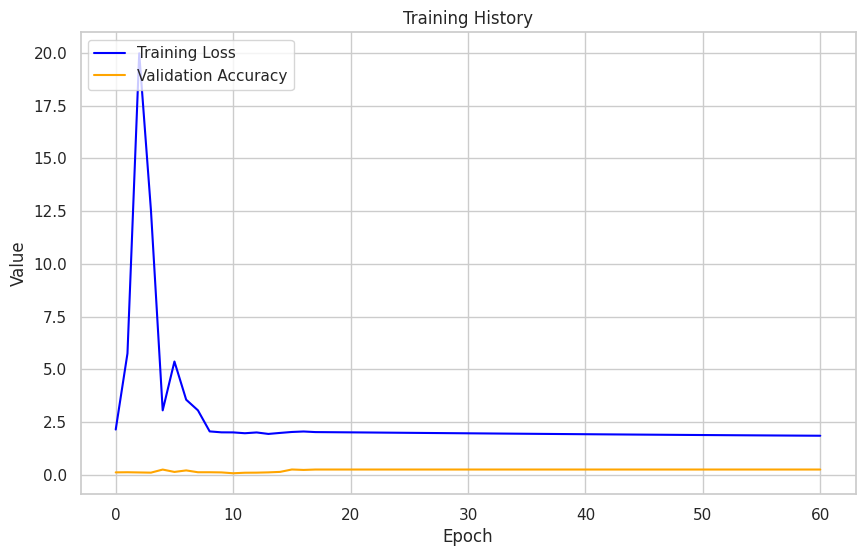

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 2261, 7: 0}
Epoch   0 | Train Loss: 2.143 | Train Acc:  11.74% | Val Loss: 2.14 | Val Acc: 11.20%
Epoch  10 | Train Loss: 2.007 | Train Acc:   8.97% | Val Loss: 2.00 | Val Acc: 7.02%
Epoch  20 | Train Loss: 2.009 | Train Acc:  25.45% | Val Loss: 2.01 | Val Acc: 24.67%
Epoch  30 | Train Loss: 1.964 | Train Acc:  25.45% | Val Loss: 1.97 | Val Acc: 24.67%
Epoch  40 | Train Loss: 1.921 | Train Acc:  25.45% | Val Loss: 1.92 | Val Acc: 24.67%
Epoch  50 | Train Loss: 1.882 | Train Acc:  25.45% | Val Loss: 1.88 | Val Acc: 24.67%
Epoch  60 | Train Loss: 1.849 | Train Acc:  25.45% | Val Loss: 1.85 | Val Acc: 24.67%


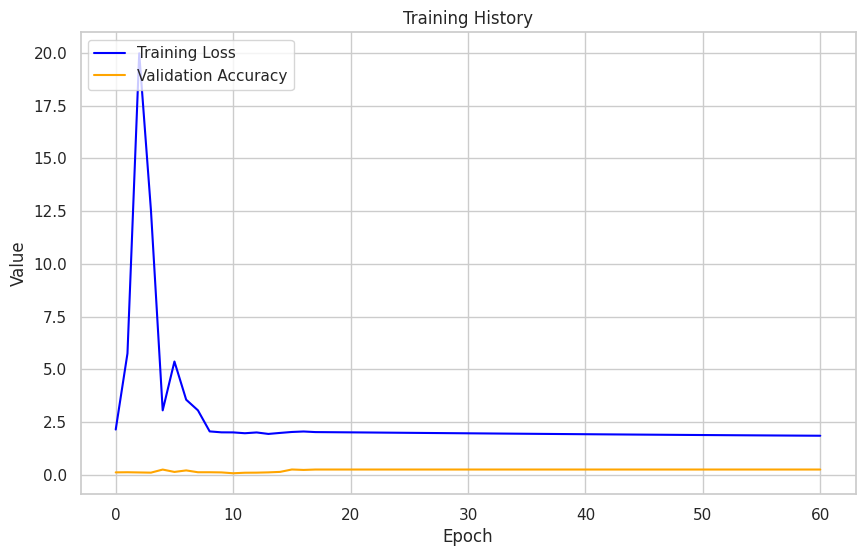

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 2261, 7: 0}
Epoch   0 | Train Loss: 2.143 | Train Acc:  11.74% | Val Loss: 2.14 | Val Acc: 11.20%
Epoch  10 | Train Loss: 2.007 | Train Acc:   8.97% | Val Loss: 2.00 | Val Acc: 7.02%
Epoch  20 | Train Loss: 2.009 | Train Acc:  25.45% | Val Loss: 2.01 | Val Acc: 24.67%
Epoch  30 | Train Loss: 1.964 | Train Acc:  25.45% | Val Loss: 1.97 | Val Acc: 24.67%
Epoch  40 | Train Loss: 1.921 | Train Acc:  25.45% | Val Loss: 1.92 | Val Acc: 24.67%
Epoch  50 | Train Loss: 1.882 | Train Acc:  25.45% | Val Loss: 1.88 | Val Acc: 24.67%
Epoch  60 | Train Loss: 1.849 | Train Acc:  25.45% | Val Loss: 1.85 | Val Acc: 24.67%


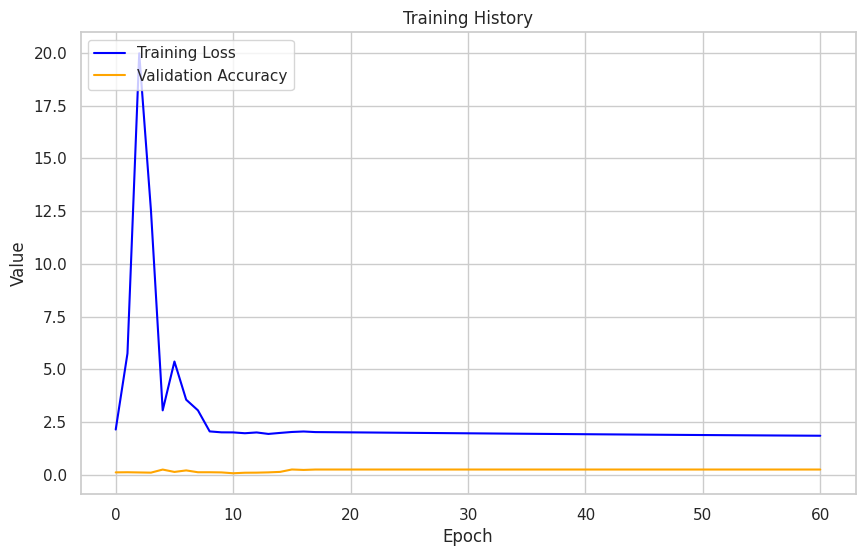

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 2261, 7: 0}
Epoch   0 | Train Loss: 2.143 | Train Acc:  11.74% | Val Loss: 2.14 | Val Acc: 11.20%
Epoch  10 | Train Loss: 2.106 | Train Acc:  25.45% | Val Loss: 2.06 | Val Acc: 24.67%
Epoch  20 | Train Loss: 1.616 | Train Acc:  25.58% | Val Loss: 1.63 | Val Acc: 24.67%
Epoch  30 | Train Loss: 1.281 | Train Acc:  36.63% | Val Loss: 1.26 | Val Acc: 34.91%
Epoch  40 | Train Loss: 0.784 | Train Acc:  61.17% | Val Loss: 0.78 | Val Acc: 60.91%
Epoch  50 | Train Loss: 0.550 | Train Acc:  71.99% | Val Loss: 0.54 | Val Acc: 71.35%
Epoch  60 | Train Loss: 0.377 | Train Acc:  84.41% | Val Loss: 0.37 | Val Acc: 87.48%


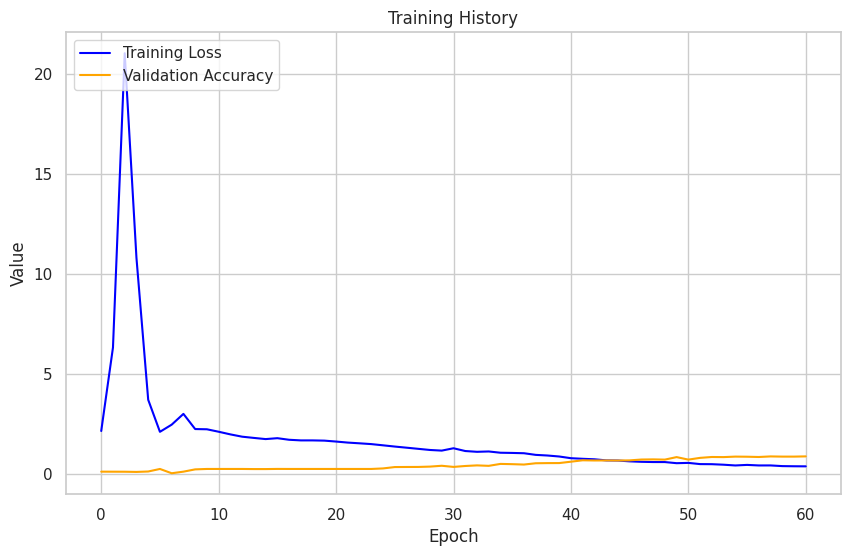

{0: 0, 1: 476, 2: 215, 3: 393, 4: 248, 5: 235, 6: 622, 7: 72}
Epoch   0 | Train Loss: 2.143 | Train Acc:  11.74% | Val Loss: 2.14 | Val Acc: 11.20%
Epoch  10 | Train Loss: 2.106 | Train Acc:  25.45% | Val Loss: 2.06 | Val Acc: 24.67%
Epoch  20 | Train Loss: 1.616 | Train Acc:  25.58% | Val Loss: 1.63 | Val Acc: 24.67%
Epoch  30 | Train Loss: 1.281 | Train Acc:  36.63% | Val Loss: 1.26 | Val Acc: 34.91%
Epoch  40 | Train Loss: 0.784 | Train Acc:  61.17% | Val Loss: 0.78 | Val Acc: 60.91%
Epoch  50 | Train Loss: 0.550 | Train Acc:  71.99% | Val Loss: 0.54 | Val Acc: 71.35%
Epoch  60 | Train Loss: 0.377 | Train Acc:  84.41% | Val Loss: 0.37 | Val Acc: 87.48%


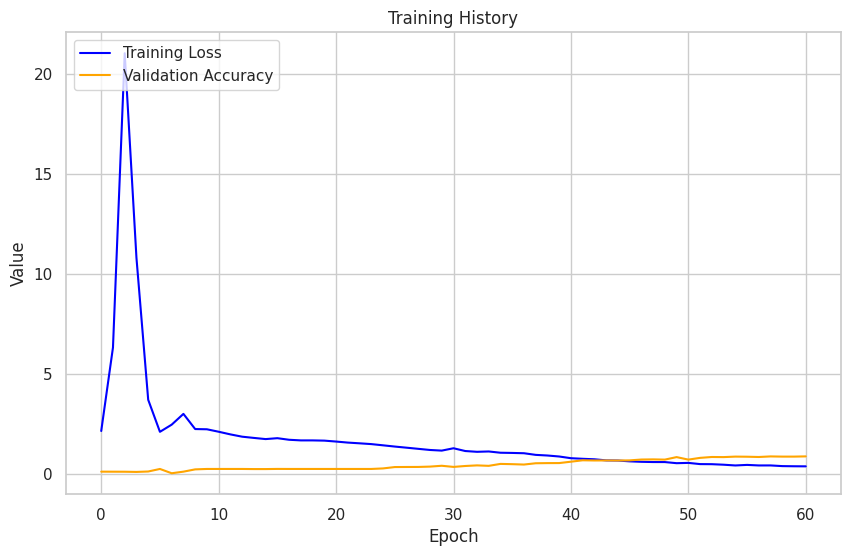

{0: 0, 1: 476, 2: 215, 3: 393, 4: 248, 5: 235, 6: 622, 7: 72}
Epoch   0 | Train Loss: 2.143 | Train Acc:  11.74% | Val Loss: 2.14 | Val Acc: 11.20%
Epoch  10 | Train Loss: 2.106 | Train Acc:  25.45% | Val Loss: 2.06 | Val Acc: 24.67%
Epoch  20 | Train Loss: 1.616 | Train Acc:  25.58% | Val Loss: 1.63 | Val Acc: 24.67%
Epoch  30 | Train Loss: 1.281 | Train Acc:  36.63% | Val Loss: 1.26 | Val Acc: 34.91%
Epoch  40 | Train Loss: 0.784 | Train Acc:  61.17% | Val Loss: 0.78 | Val Acc: 60.91%
Epoch  50 | Train Loss: 0.550 | Train Acc:  71.99% | Val Loss: 0.54 | Val Acc: 71.35%
Epoch  60 | Train Loss: 0.377 | Train Acc:  84.41% | Val Loss: 0.37 | Val Acc: 87.48%


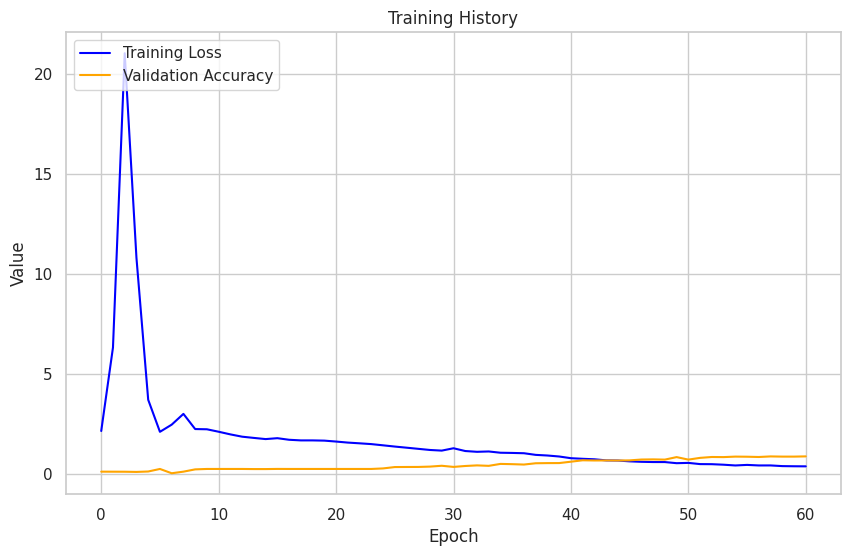

{0: 0, 1: 476, 2: 215, 3: 393, 4: 248, 5: 235, 6: 622, 7: 72}
Epoch   0 | Train Loss: 2.143 | Train Acc:  11.74% | Val Loss: 2.14 | Val Acc: 11.20%
Epoch  10 | Train Loss: 2.106 | Train Acc:  25.45% | Val Loss: 2.06 | Val Acc: 24.67%
Epoch  20 | Train Loss: 1.616 | Train Acc:  25.58% | Val Loss: 1.63 | Val Acc: 24.67%
Epoch  30 | Train Loss: 1.281 | Train Acc:  36.63% | Val Loss: 1.26 | Val Acc: 34.91%
Epoch  40 | Train Loss: 0.784 | Train Acc:  61.17% | Val Loss: 0.78 | Val Acc: 60.91%
Epoch  50 | Train Loss: 0.550 | Train Acc:  71.99% | Val Loss: 0.54 | Val Acc: 71.35%
Epoch  60 | Train Loss: 0.377 | Train Acc:  84.41% | Val Loss: 0.37 | Val Acc: 87.48%


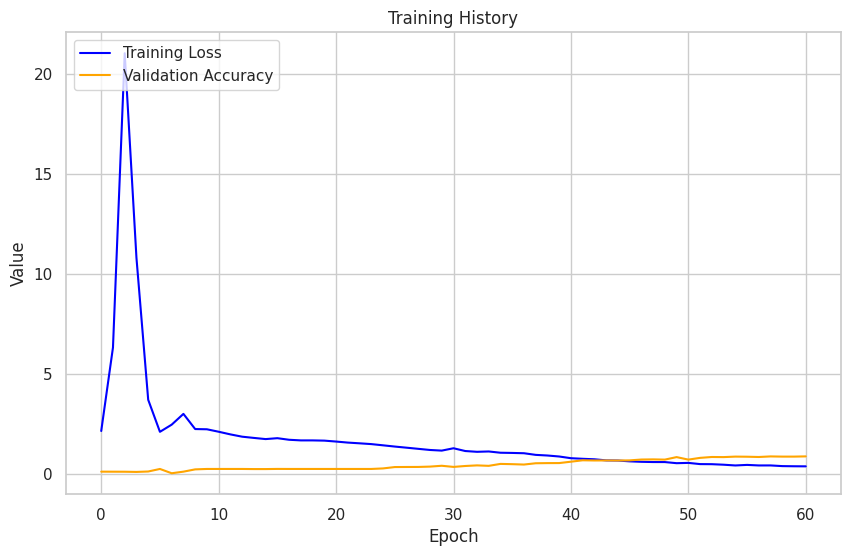

{0: 0, 1: 476, 2: 215, 3: 393, 4: 248, 5: 235, 6: 622, 7: 72}
Epoch   0 | Train Loss: 2.143 | Train Acc:  11.74% | Val Loss: 2.14 | Val Acc: 11.20%
Epoch  10 | Train Loss: 1.728 | Train Acc:  25.46% | Val Loss: 1.68 | Val Acc: 24.67%
Epoch  20 | Train Loss: 1.493 | Train Acc:  35.46% | Val Loss: 1.46 | Val Acc: 33.97%
Epoch  30 | Train Loss: 1.183 | Train Acc:  50.49% | Val Loss: 1.14 | Val Acc: 51.42%
Epoch  40 | Train Loss: 0.939 | Train Acc:  63.35% | Val Loss: 0.87 | Val Acc: 63.76%
Epoch  50 | Train Loss: 0.779 | Train Acc:  69.21% | Val Loss: 0.72 | Val Acc: 70.78%
Epoch  60 | Train Loss: 0.703 | Train Acc:  76.30% | Val Loss: 0.62 | Val Acc: 79.32%


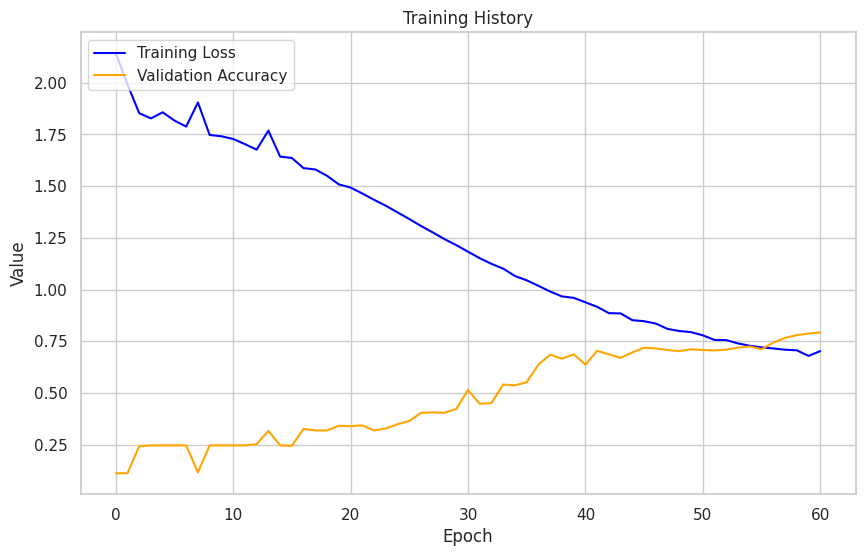

{0: 0, 1: 606, 2: 209, 3: 201, 4: 120, 5: 262, 6: 863, 7: 0}
Epoch   0 | Train Loss: 2.143 | Train Acc:  11.74% | Val Loss: 2.14 | Val Acc: 11.20%
Epoch  10 | Train Loss: 1.728 | Train Acc:  25.46% | Val Loss: 1.68 | Val Acc: 24.67%
Epoch  20 | Train Loss: 1.493 | Train Acc:  35.46% | Val Loss: 1.46 | Val Acc: 33.97%
Epoch  30 | Train Loss: 1.183 | Train Acc:  50.49% | Val Loss: 1.14 | Val Acc: 51.42%


KeyboardInterrupt: 

In [ ]:
#Espacio de búsqueda de hiperparámetros
hyperparams_grid = {
    'lr': [0.01, 0.001],
    'weight_decay': [5e-4, 1e-4],
    'heads': [4, 8, 16, 32],
}

best_val_acc1 = 0
best_hyperparams = {}

#Combinaciones de hiperparámetros
for lr in hyperparams_grid['lr']:
    for weight_decay in hyperparams_grid['weight_decay']:
        for heads in hyperparams_grid['heads']:
            #Modelo con los hiperparámetros actuales
            gat = GATc(data.num_features, data.num_classes)
            gat.optimizer = torch.optim.Adam(gat.parameters(), lr=lr, weight_decay=weight_decay)


            trained_model = train(gat, data, epochs=60)

            #Validación
            val_acc = test(trained_model, data)


            if val_acc > best_val_acc1:
                best_val_acc1 = val_acc
                best_hyperparams['lr'] = lr
                best_hyperparams['weight_decay'] = weight_decay
                best_hyperparams['heads'] = heads

#Los mejores hiperparámetros y la precisión de validación
print("Best validation accuracy:", best_val_acc1)
print("Best hyperparameters:", best_hyperparams)

#Nota: No converge

### **5.5 Modelo  GraphSAGE**

Se construye un modelo que busca aprender representaciones de nodos mediante la agregación y combinación de información del vecindario local del nodo en el grafo. Esto se logra a través de una estrategia de muestreo y agregación donde, en cada iteración de entrenamiento, un nodo muestrea un vecindario de tamaño fijo y agrega información de sus vecinos. Este proceso permite a GraphSAGE generar representaciones vectoriales de baja dimensión para los nodos que capturan tanto el papel estructural del nodo en el grafo como sus características.

In [198]:
def test(model, data, MLP=False):
    model.eval()
    if MLP:
      out = model(data.x)
    else:
      _, out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)

    # Count the number of predictions for each class
    class_counts = {}
    for class_label in range(data.num_classes):
        class_counts[class_label] = int((pred == class_label)[data.test_mask].sum())

    print(class_counts)

    test_acc = accuracy(pred[data.test_mask], data.y[data.test_mask])
    return test_acc


def train(model, data, epochs=10, plot=True, plot_name = "plot", MLP=False):
    weight = torch.tensor([1 / i for i in df_agg_classes["proportion"].values], dtype=torch.float)
    criterion = torch.nn.CrossEntropyLoss(weight=weight)
    optimizer = model.optimizer

    history = {
            'epoch': [],
            'loss': [],
            'test_acc': [],
            'outputs' : []
    }

    model.train()
    for epoch in range(epochs+1):
        # Training
        optimizer.zero_grad()
        if MLP:
          out = model(data.x)
        else:
          _, out = model(data.x, data.edge_index)

        loss = criterion(out[data.train_mask], data.y[data.train_mask])
        acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
        loss.backward()
        optimizer.step()

        # Validation
        val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
        val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])

        history['epoch'].append(epoch)
        history['loss'].append(loss.item())
        history['test_acc'].append(val_acc)
        history['outputs'].append(out[data.train_mask].argmax(dim=1))

        # Print metrics every 10 epochs
        if(epoch % 10 == 0):
            print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: '
                  f'{acc*100:>6.2f}% | Val Loss: {val_loss:.2f} | '
                  f'Val Acc: {val_acc*100:.2f}%')

    if plot:
        history_plot(history, plot_name)

    return model

In [199]:
data

Data(x=[7535, 745], edge_index=[2, 238162], y=[7535], num_classes=8, train_mask=[7535], test_mask=[7535], val_mask=[7535])

In [200]:
from torch_geometric.loader import NeighborLoader
from torch_geometric.utils import to_networkx

batch_size = len(data.train_mask.nonzero(as_tuple=False)) // 4

# Create batches with neighbor sampling
train_loader = NeighborLoader(
    data,
    num_neighbors=[5, 50],
    batch_size=batch_size,
    input_nodes=data.train_mask,
)

/usr/local/lib/python3.10/dist-packages/torch_geometric/sampler/neighbor_sampler.py:61: UserWarning: Using 'NeighborSampler' without a 'pyg-lib' installation is deprecated and will be removed soon. Please install 'pyg-lib' for accelerated neighborhood sampling
  warnings.warn(f"Using '{self.__class__.__name__}' without a "


Subgraph 0: Data(x=[7248, 745], edge_index=[2, 93354], y=[7248], num_classes=8, train_mask=[7248], test_mask=[7248], val_mask=[7248], n_id=[7248], e_id=[93354], input_id=[1318], batch_size=1318)
Subgraph 1: Data(x=[7253, 745], edge_index=[2, 93018], y=[7253], num_classes=8, train_mask=[7253], test_mask=[7253], val_mask=[7253], n_id=[7253], e_id=[93018], input_id=[1318], batch_size=1318)
Subgraph 2: Data(x=[7270, 745], edge_index=[2, 92500], y=[7270], num_classes=8, train_mask=[7270], test_mask=[7270], val_mask=[7270], n_id=[7270], e_id=[92500], input_id=[1318], batch_size=1318)
Subgraph 3: Data(x=[7288, 745], edge_index=[2, 92959], y=[7288], num_classes=8, train_mask=[7288], test_mask=[7288], val_mask=[7288], n_id=[7288], e_id=[92959], input_id=[1318], batch_size=1318)
Subgraph 4: Data(x=[251, 745], edge_index=[2, 305], y=[251], num_classes=8, train_mask=[251], test_mask=[251], val_mask=[251], n_id=[251], e_id=[305], input_id=[2], batch_size=2)


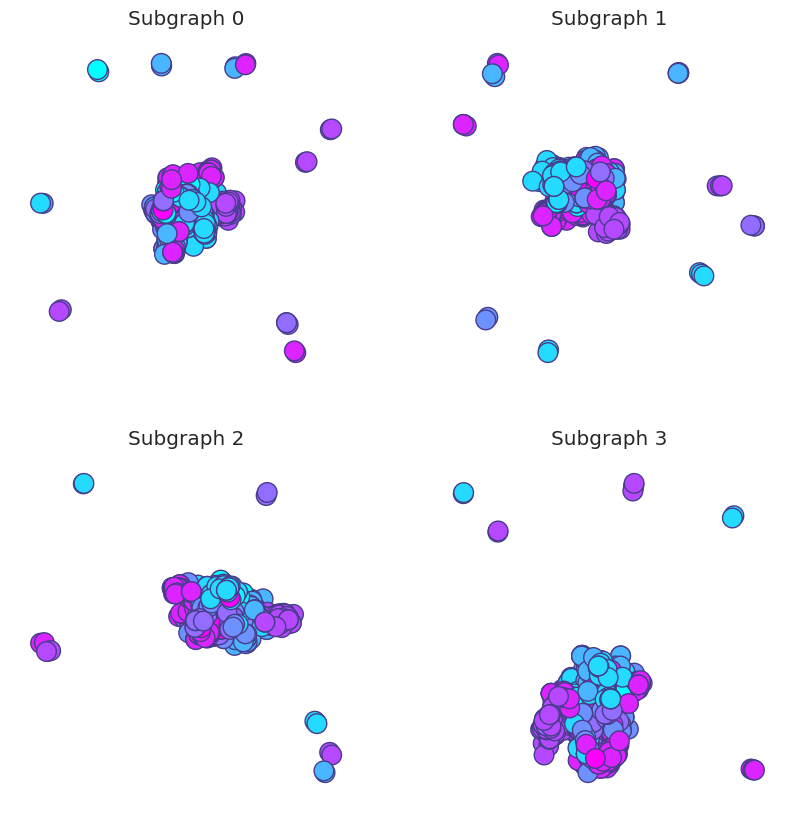

In [73]:
# Print each subgraph
for i, subgraph in enumerate(train_loader):
    print(f'Subgraph {i}: {subgraph}')

# Plot each subgraph
fig = plt.figure(figsize=(10,10))
for idx, (subdata, pos) in enumerate(zip(train_loader, [221, 222, 223, 224])):
    G = to_networkx(subdata, to_undirected=True)
    ax = fig.add_subplot(pos)
    ax.set_title(f'Subgraph {idx}')
    plt.axis('off')
    nx.draw_networkx(G,
                    pos=nx.spring_layout(G, seed=0),
                    with_labels=False,
                    node_size=200,
                    node_color=subdata.y,
                    cmap="cool",
                    font_size=10,
                    edgecolors='darkslateblue',
                    )
plt.show()

Creamos cuatro subgrafos de varios tamaños. Nos permite procesarlos en paralelo y es más fácil procesarlos.

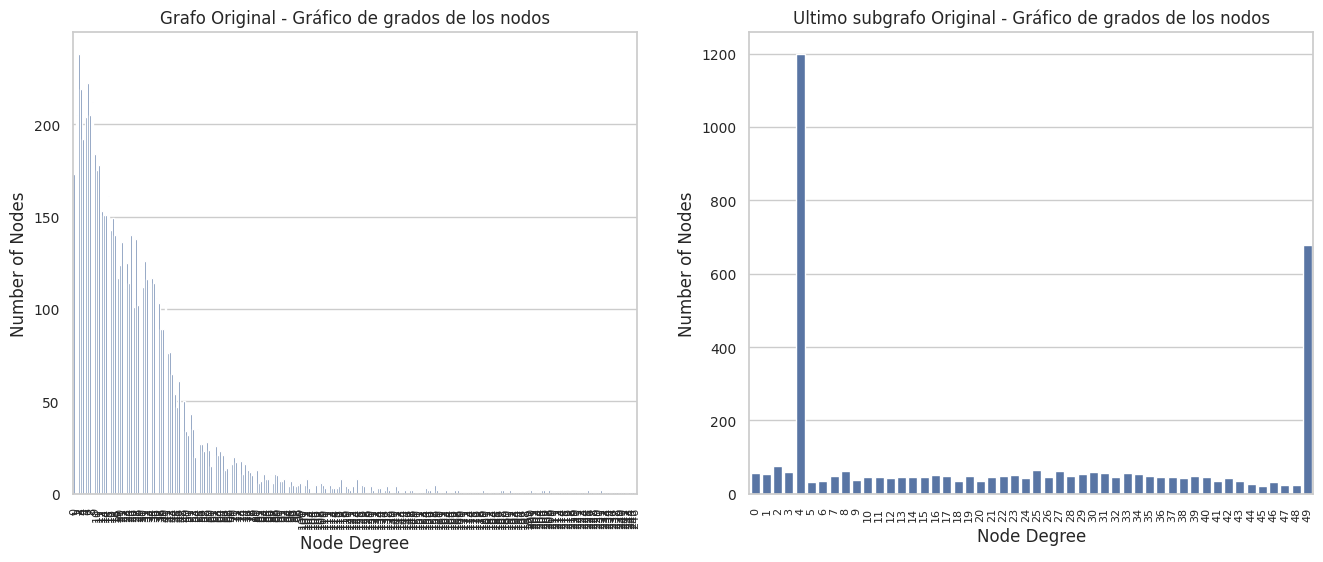

In [201]:
from torch_geometric.utils import degree
from collections import Counter
import seaborn as sns
import matplotlib.ticker as ticker

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

def plot_degree(data, index, title):
    # Obtener lista de grados para cada nodo
    degrees = degree(data.edge_index[index]).numpy()
    # Contar el número de nodos para cada grado
    numbers = Counter(degrees)
    # Convertir los datos a un DataFrame de pandas
    degree_df = pd.DataFrame.from_dict(numbers, orient='index').reset_index()
    degree_df.columns = ['Degree', 'Count']
    sns.barplot(ax=axes[index], x='Degree', y='Count', data=degree_df)
    axes[index].set_xlabel('Node Degree')
    axes[index].set_ylabel('Number of Nodes')
    axes[index].set_title(title)
    axes[index].xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    axes[index].tick_params(axis='x', labelsize=8)
    axes[index].tick_params(axis='y', labelsize=10)
    axes[index].set_xticks(range(len(degree_df)))
    axes[index].set_xticklabels(axes[index].get_xticklabels(), rotation=90)

plot_degree(data,0,'Grafo Original - Gráfico de grados de los nodos')
plot_degree(subdata,1,'Ultimo subgrafo Original - Gráfico de grados de los nodos')

El primer gráfico muestra la distribución original de los grados de los nodos, mientras que el segundo muestra la distribución obtenida después del muestreo de vecinos. En este ejemplo, elegimos considerar solo cinco vecinos, que es mucho menor que el valor máximo original. Es importante recordar este compromiso al hablar sobre GraphSAGE.

PinSAGE propone otra solución. En lugar de muestreo de vecinos, PinSAGE simula caminatas aleatorias para cada nodo, lo que captura una representación mejor de sus vecindarios. Luego, selecciona un número predefinido de vecinos con el mayor número de visitas. Esta técnica permite a PinSAGE considerar la importancia de cada vecino mientras controla el tamaño del grafo de computación.

In [202]:
class GraphSAGE(torch.nn.Module):
  def __init__(self, dim_input, dim_hidden, dim_output):
    super().__init__()
    self.sage1 = SAGEConv(dim_input, dim_hidden)
    self.sage2 = SAGEConv(dim_hidden, dim_output)
    self.optimizer = torch.optim.Adam(self.parameters(),
                                      lr=0.01,
                                      weight_decay=5e-4)

  def forward(self, x, edge_index):
    h = self.sage1(x, edge_index).relu()
    h = F.dropout(h, p=0.1, training=self.training)
    h = self.sage2(h, edge_index)
    return F.log_softmax(h, dim=1)

  def fit(self, data, epochs):
    weight = torch.tensor([1 / i for i in df_agg_classes["proportion"].values], dtype=torch.float)
    criterion = torch.nn.CrossEntropyLoss(weight=weight)
    optimizer = self.optimizer

    self.train()
    for epoch in range(epochs+1):
      total_loss = 0
      acc = 0
      val_loss = 0
      val_acc_SAGE = 0
      torch.manual_seed(42)

      # Train on batches
      for batch in train_loader:
        optimizer.zero_grad()
        out = self(batch.x, batch.edge_index)
        loss = criterion(out[batch.train_mask], batch.y[batch.train_mask])
        total_loss += loss
        acc += accuracy(out[batch.train_mask].argmax(dim=1),
                        batch.y[batch.train_mask])
        loss.backward()
        optimizer.step()

        # Validation
        val_loss += criterion(out[batch.val_mask], batch.y[batch.val_mask])
        val_acc_SAGE += accuracy(out[batch.val_mask].argmax(dim=1),
                            batch.y[batch.val_mask])

      # Print metrics every 10 epochs
      if(epoch % 10 == 0):
          print(f'Epoch {epoch:>3} | Train Loss: {total_loss/len(train_loader):.3f} '
                f'| Train Acc: {acc/len(train_loader)*100:>6.2f}% | Val Loss: '
                f'{val_loss/len(train_loader):.2f} | Val Acc: '
                f'{val_acc_SAGE/len(train_loader)*100:.2f}%')

In [203]:
@torch.no_grad()
def test(model, data):
    """Evaluate the model on test set and print the accuracy score."""
    model.eval()
    out = model(data.x, data.edge_index)
    acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
    return acc

Con GraphSAGE, recorremos lotes (nuestros cuatro subgrafos) creados por el proceso de muestreo vecino. La forma en que calculamos la precisión y la pérdida de validación también es diferente por eso.

In [205]:
%%time

# Create GraphSAGE
graphsage = GraphSAGE(data.num_features, 64, data.num_classes)
print(graphsage)

# Train
graphsage.fit(data, 60)

# Test
print(f'\nGraphSAGE test accuracy: {test(graphsage, data)*100:.2f}%\n')

GraphSAGE(
  (sage1): SAGEConv(745, 64, aggr=mean)
  (sage2): SAGEConv(64, 8, aggr=mean)
)
Epoch   0 | Train Loss: 3.199 | Train Acc:  28.31% | Val Loss: 2.92 | Val Acc: 31.26%
Epoch  10 | Train Loss: 0.527 | Train Acc:  80.44% | Val Loss: 0.63 | Val Acc: 79.12%
Epoch  20 | Train Loss: 0.305 | Train Acc:  88.09% | Val Loss: 0.49 | Val Acc: 85.94%
Epoch  30 | Train Loss: 0.172 | Train Acc:  94.37% | Val Loss: 0.41 | Val Acc: 90.26%
Epoch  40 | Train Loss: 0.112 | Train Acc:  96.82% | Val Loss: 0.41 | Val Acc: 91.45%
Epoch  50 | Train Loss: 0.083 | Train Acc:  97.59% | Val Loss: 0.42 | Val Acc: 91.61%
Epoch  60 | Train Loss: 0.071 | Train Acc:  97.94% | Val Loss: 0.44 | Val Acc: 91.57%

GraphSAGE test accuracy: 95.22%

CPU times: user 1min 18s, sys: 43.3 s, total: 2min 1s
Wall time: 2min 8s


**Matriz de Confusion**

A continuacion se genera la matriz de confusion de mejor modelo, donde se observa que las clases #3 y #9 presentan los mayores errores en clasificacion:

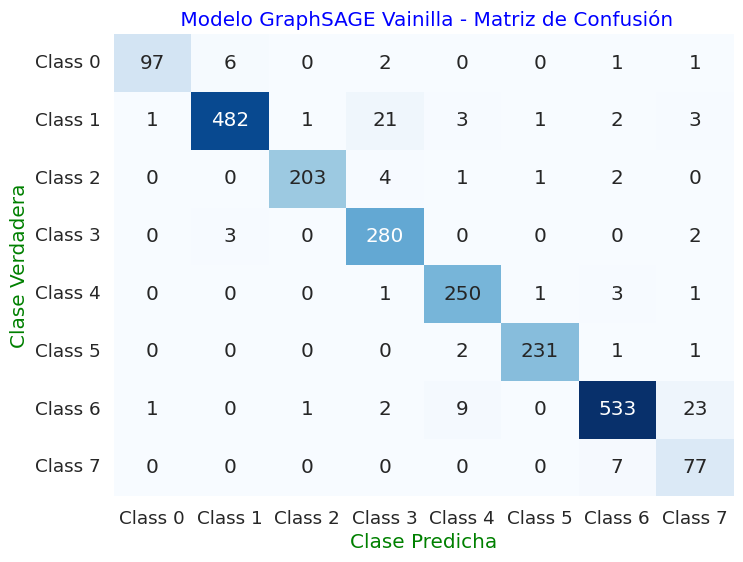

In [209]:
graphsage.eval()
with torch.no_grad():
    logits = graphsage(data.x, data.edge_index)
    y_pred = logits[data.test_mask].max(1)[1].cpu().numpy()
    y_true = data.y[data.test_mask].cpu().numpy()

conf_matrix = confusion_matrix(y_true, y_pred)


# Obtener nombres de las clases
class_names = [f'Class {i}' for i in range(data.num_classes)]

# Crear la figura de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajustar el tamaño de fuente

# Crear un mapa de calor con la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)

# Añadir etiquetas y título
plt.title(' Modelo GraphSAGE Vainilla - Matriz de Confusión', color='blue')
plt.xlabel('Clase Predicha', color='green')
plt.ylabel('Clase Verdadera', color='green')

# Mostrar la gráfica
plt.show()

In [ ]:
out = graphsage(data.x, data.edge_index)
visualize(out[data.test_mask], color=data.y[data.test_mask])

## **6. Conclusiones**


Los 5 modelos trabajados reflejan los siguientes resultados siendo el mejor GAT con un accuracy  de 94%

In [210]:
pip install tabulate

In [266]:
from tabulate import tabulate

# Datos de modelos y precisión
data = [
    ["1","MLP vainilla", MPL_acc1 * 100],
    ["2","MLP con tuneo de Hiperparámetros", best_accuracy_MPL * 100],
    ["3","GCN vainilla", GCN_acc1 * 100],
    ["4","GCN con tuneo de Hiperparámetros", test_acc * 100],
    ["5","GATv2Conv vainilla", GATv2Conv_acc * 100],
    ["6","GATv2Conv con tuneo de Hiperparámetros", "No converge"],
    ["7","GATConv  vainilla",GATvConv_acc*100],
   ["8","GraphSAGE Vainilla",95.22],

]

# Impresión de la tabla
table = tabulate(data, headers=["#","Modelo", "Precisión (%)"], tablefmt="grid")
print(table)


+-----+----------------------------------------+--------------------+
|   # | Modelo                                 | Precisión (%)      |
+=====+========================================+====================+
|   1 | MLP vainilla                           | 43.520565032958984 |
+-----+----------------------------------------+--------------------+
|   2 | MLP con tuneo de Hiperparámetros       | 85.75851440429688  |
+-----+----------------------------------------+--------------------+
|   3 | GCN vainilla                           | 87.04113006591797  |
+-----+----------------------------------------+--------------------+
|   4 | GCN con tuneo de Hiperparámetros       | 87.04113006591797  |
+-----+----------------------------------------+--------------------+
|   5 | GATv2Conv vainilla                     | 94.60415649414062  |
+-----+----------------------------------------+--------------------+
|   6 | GATv2Conv con tuneo de Hiperparámetros | No converge        |
+-----+-------------